In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the CSV files
file1_path = 'combined_genes_TB_comp1.csv'  # Replace with your actual file path
file2_path = 'CTD_genes_pathways.csv'  # Replace with your actual file path

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Merge the dataframes on 'GeneSymbol'
merged_df = pd.merge(df1, df2, on='GeneSymbol')

# Save the merged dataframe to a new CSV file
merged_file_path = 'combined_genes_TB_comp1.csv'  # Replace with your desired output file path
merged_df.to_csv(merged_file_path, index=False)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the CSV files
file1_path = 'combined_genes_TB_pathways_comp1.csv'  # Replace with your actual file path
file2_path = 'TB_pathways.csv'  # Replace with your actual file path

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Merge the dataframes on 'Pathway' and 'Pathway ID'
merged_df = pd.merge(df1, df2, on=['Pathway', 'Pathway ID'])

# Save the merged dataframe to a new CSV file
merged_file_path = 'merged_file_pathway_genes_TB_comp1.csv'  # Replace with your desired output file path
merged_df.to_csv(merged_file_path, index=False)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the CSV files
file1_path = 'TB_phenotype.csv'  # Replace with your actual file path
file2_path = 'merged_file_pathway_genes_TB_comp1.csv'  # Replace with your actual file path

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Merge the dataframes on 'Disease Name' and 'Disease ID'
merged_df = pd.merge(df1, df2, on=['Disease Name', 'Disease ID'])

# Save the merged dataframe to a new CSV file
merged_file_path = 'TB_gene_pathway_disease_phenotype_compound1.csv'  # Replace with your desired output file path
merged_df.to_csv(merged_file_path, index=False)

Knowledge graph saved to: knowledge_graph_compound3.png


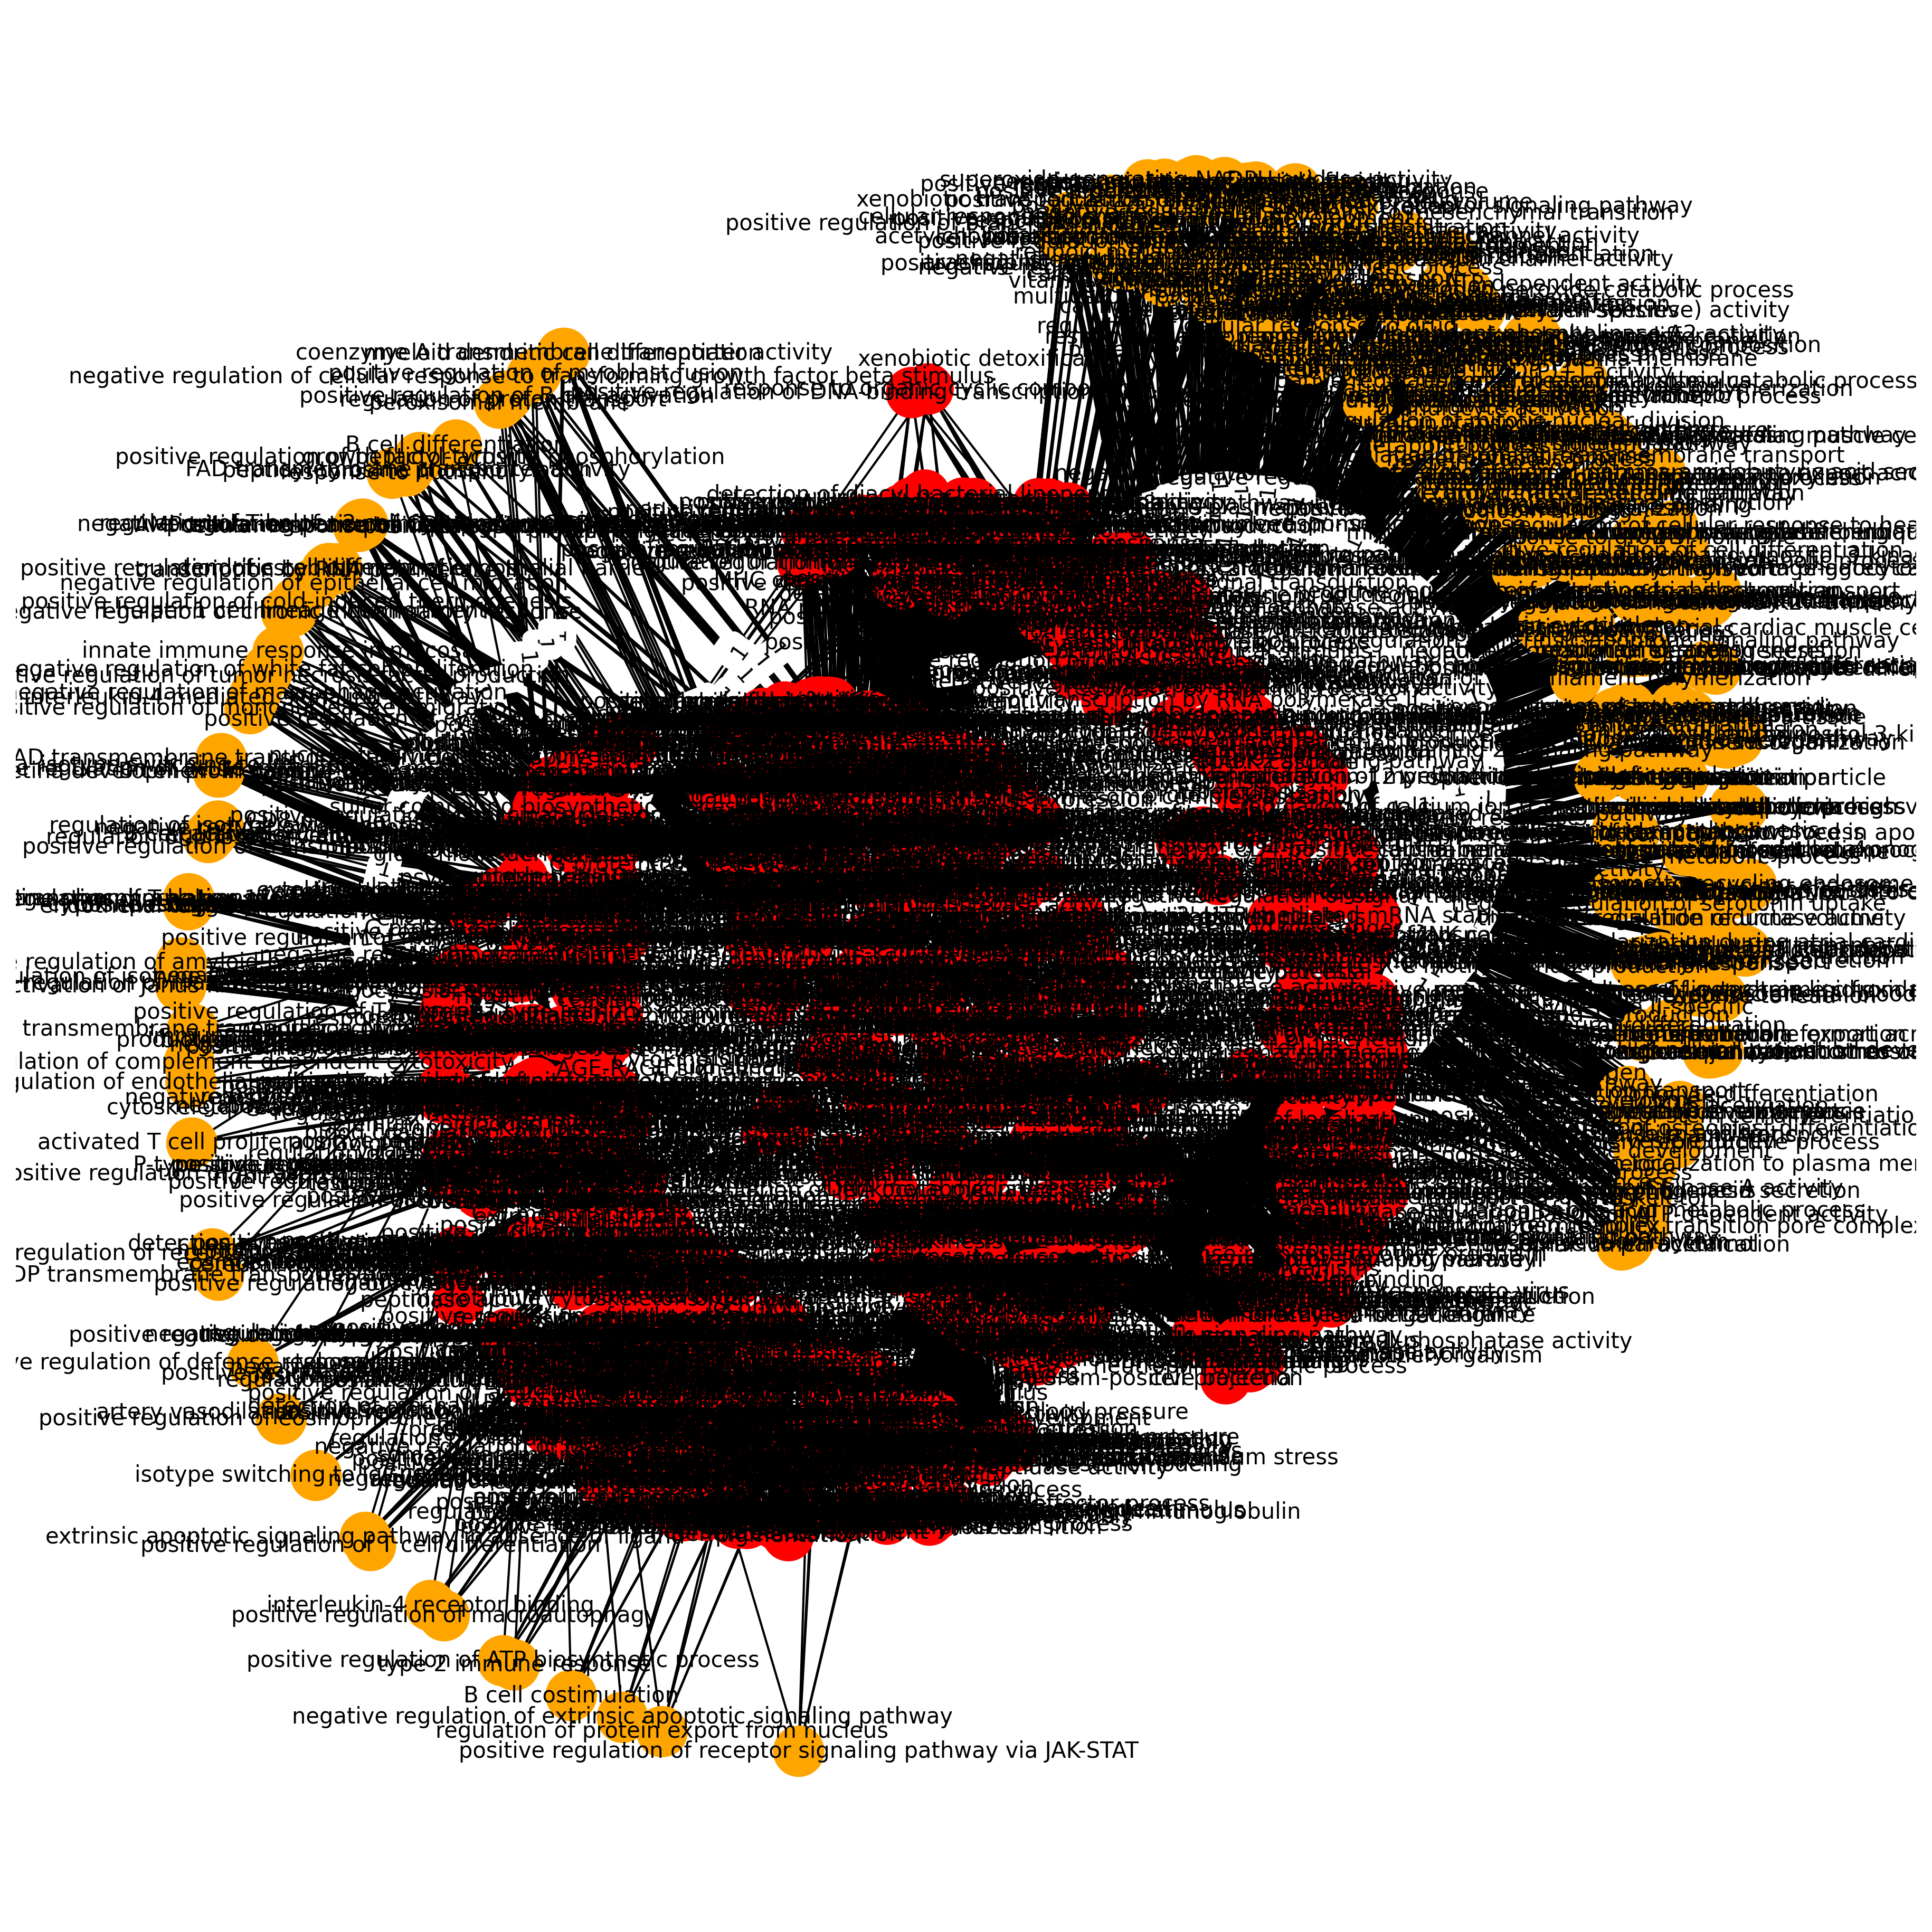

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'merged_file_gene_pathway_disease.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add nodes and edges with weights based on interactions
for index, row in df.iterrows():
    gene_symbol = row['GeneSymbol']
    pathway = row['Pathway']
    phenotype = row['Phenotype Term Name']
    disease_name = row['Disease Name']
    
    # Add edges with weights representing interactions
    G.add_edge(gene_symbol, pathway, weight=1)
    G.add_edge(gene_symbol, phenotype, weight=1)
    G.add_edge(gene_symbol, disease_name, weight=1)
    G.add_edge(pathway, phenotype, weight=1)
    G.add_edge(pathway, disease_name, weight=1)
    G.add_edge(phenotype, disease_name, weight=1)

# Calculate the degree of each node to determine interaction level
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# Assign colors based on the degree (number of interactions)
color_map = []
for node in G:
    degree = G.nodes[node]['degree']
    if degree > 10:  # High interaction
        color_map.append('red')
    elif degree > 5:  # Medium interaction
        color_map.append('orange')
    else:  # Low interaction
        color_map.append('green')

# Draw the graph
plt.figure(figsize=(12, 12), dpi=300)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=10)

# Draw edge labels for better visualization
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph
knowledge_graph_path = 'knowledge_graph_compound3.png'  # Replace with your desired output file path
plt.savefig(knowledge_graph_path)

print(f"Knowledge graph saved to: {knowledge_graph_path}")

In [ ]:
import pandas as pd
import networkx as nx

# Load the CSV file
file_path = 'GCA_comp1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add nodes and edges with weights based on interactions
for index, row in df.iterrows():
    gene_symbol = row['GeneSymbol']
    pathway = row['Pathway']
    phenotype = row['Phenotype Term Name']
    disease_name = row['Disease Name']
    
    # Add edges with weights representing interactions
    G.add_edge(gene_symbol, pathway, weight=1)
    G.add_edge(gene_symbol, phenotype, weight=1)
    G.add_edge(gene_symbol, disease_name, weight=1)
    G.add_edge(pathway, phenotype, weight=1)
    G.add_edge(pathway, disease_name, weight=1)
    G.add_edge(phenotype, disease_name, weight=1)

# Calculate the degree of each node to determine interaction level
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# Assign colors based on the degree (number of interactions)
color_map = []
for node in G:
    degree = G.nodes[node]['degree']
    if degree > 10:  # High interaction
        color_map.append('red')
    elif degree > 5:  # Medium interaction
        color_map.append('orange')
    else:  # Low interaction
        color_map.append('green')

# Save the graph to a GEXF file
gexf_file_path = 'GCA_comp1.gexf'  # Replace with your desired output file path
nx.write_gexf(G, gexf_file_path)

print(f"Knowledge graph saved to: {gexf_file_path}")

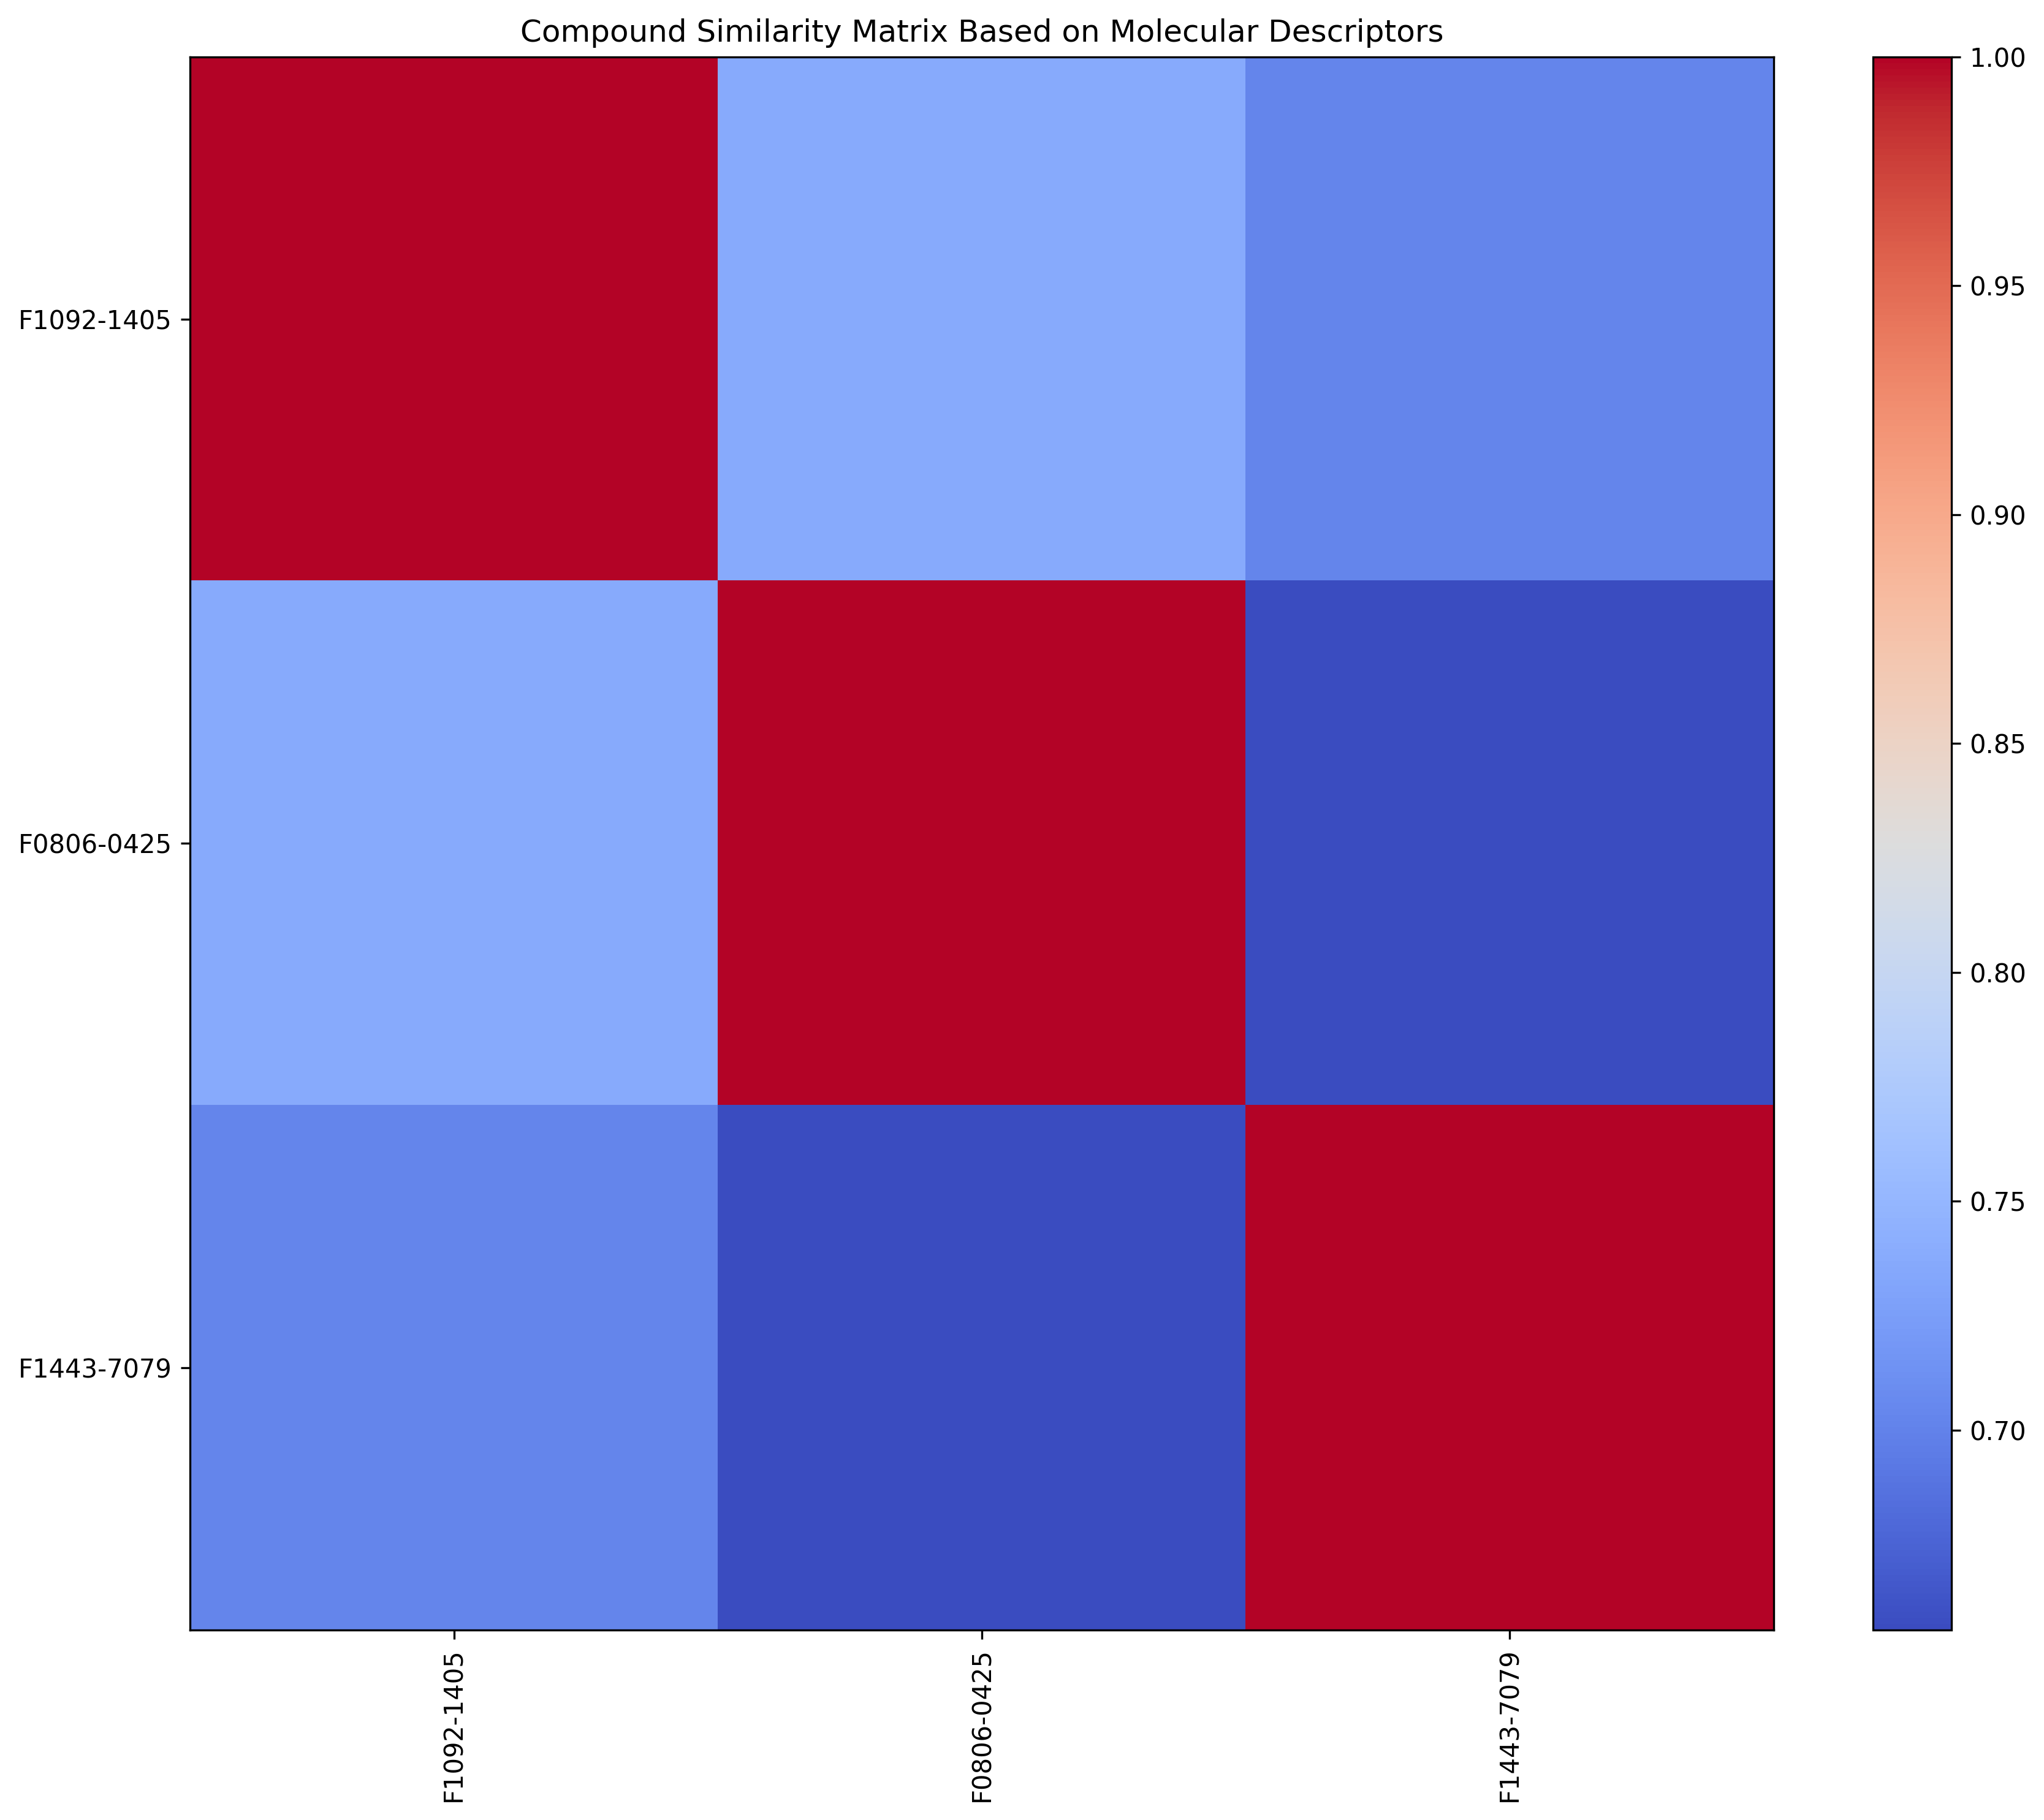

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file = pd.read_csv('descriptors_output_pearson.csv')

# Extract the Compound column and molecular descriptors
compound_names = file['Compound']
descriptors = file.drop(columns=['Compound'])

# Calculate the Pearson correlation matrix for the compounds based on molecular descriptors
compound_correlation_matrix = descriptors.T.corr(method='pearson')

# Set the compound names as the index and columns of the correlation matrix
compound_correlation_matrix.index = compound_names
compound_correlation_matrix.columns = compound_names

# Save the Pearson correlation matrix to a new CSV file
compound_correlation_matrix.to_csv('compound_similarity_matrix.csv')

# Plot the Pearson correlation matrix
plt.figure(figsize=(12, 10), dpi=300)
plt.imshow(compound_correlation_matrix, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compound_correlation_matrix.columns)), labels=compound_correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(compound_correlation_matrix.index)), labels=compound_correlation_matrix.index)
plt.title('Compound Similarity Matrix Based on Molecular Descriptors')
plt.tight_layout()
plt.savefig('compound_similarity_matrix.png', dpi=300)
plt.show()

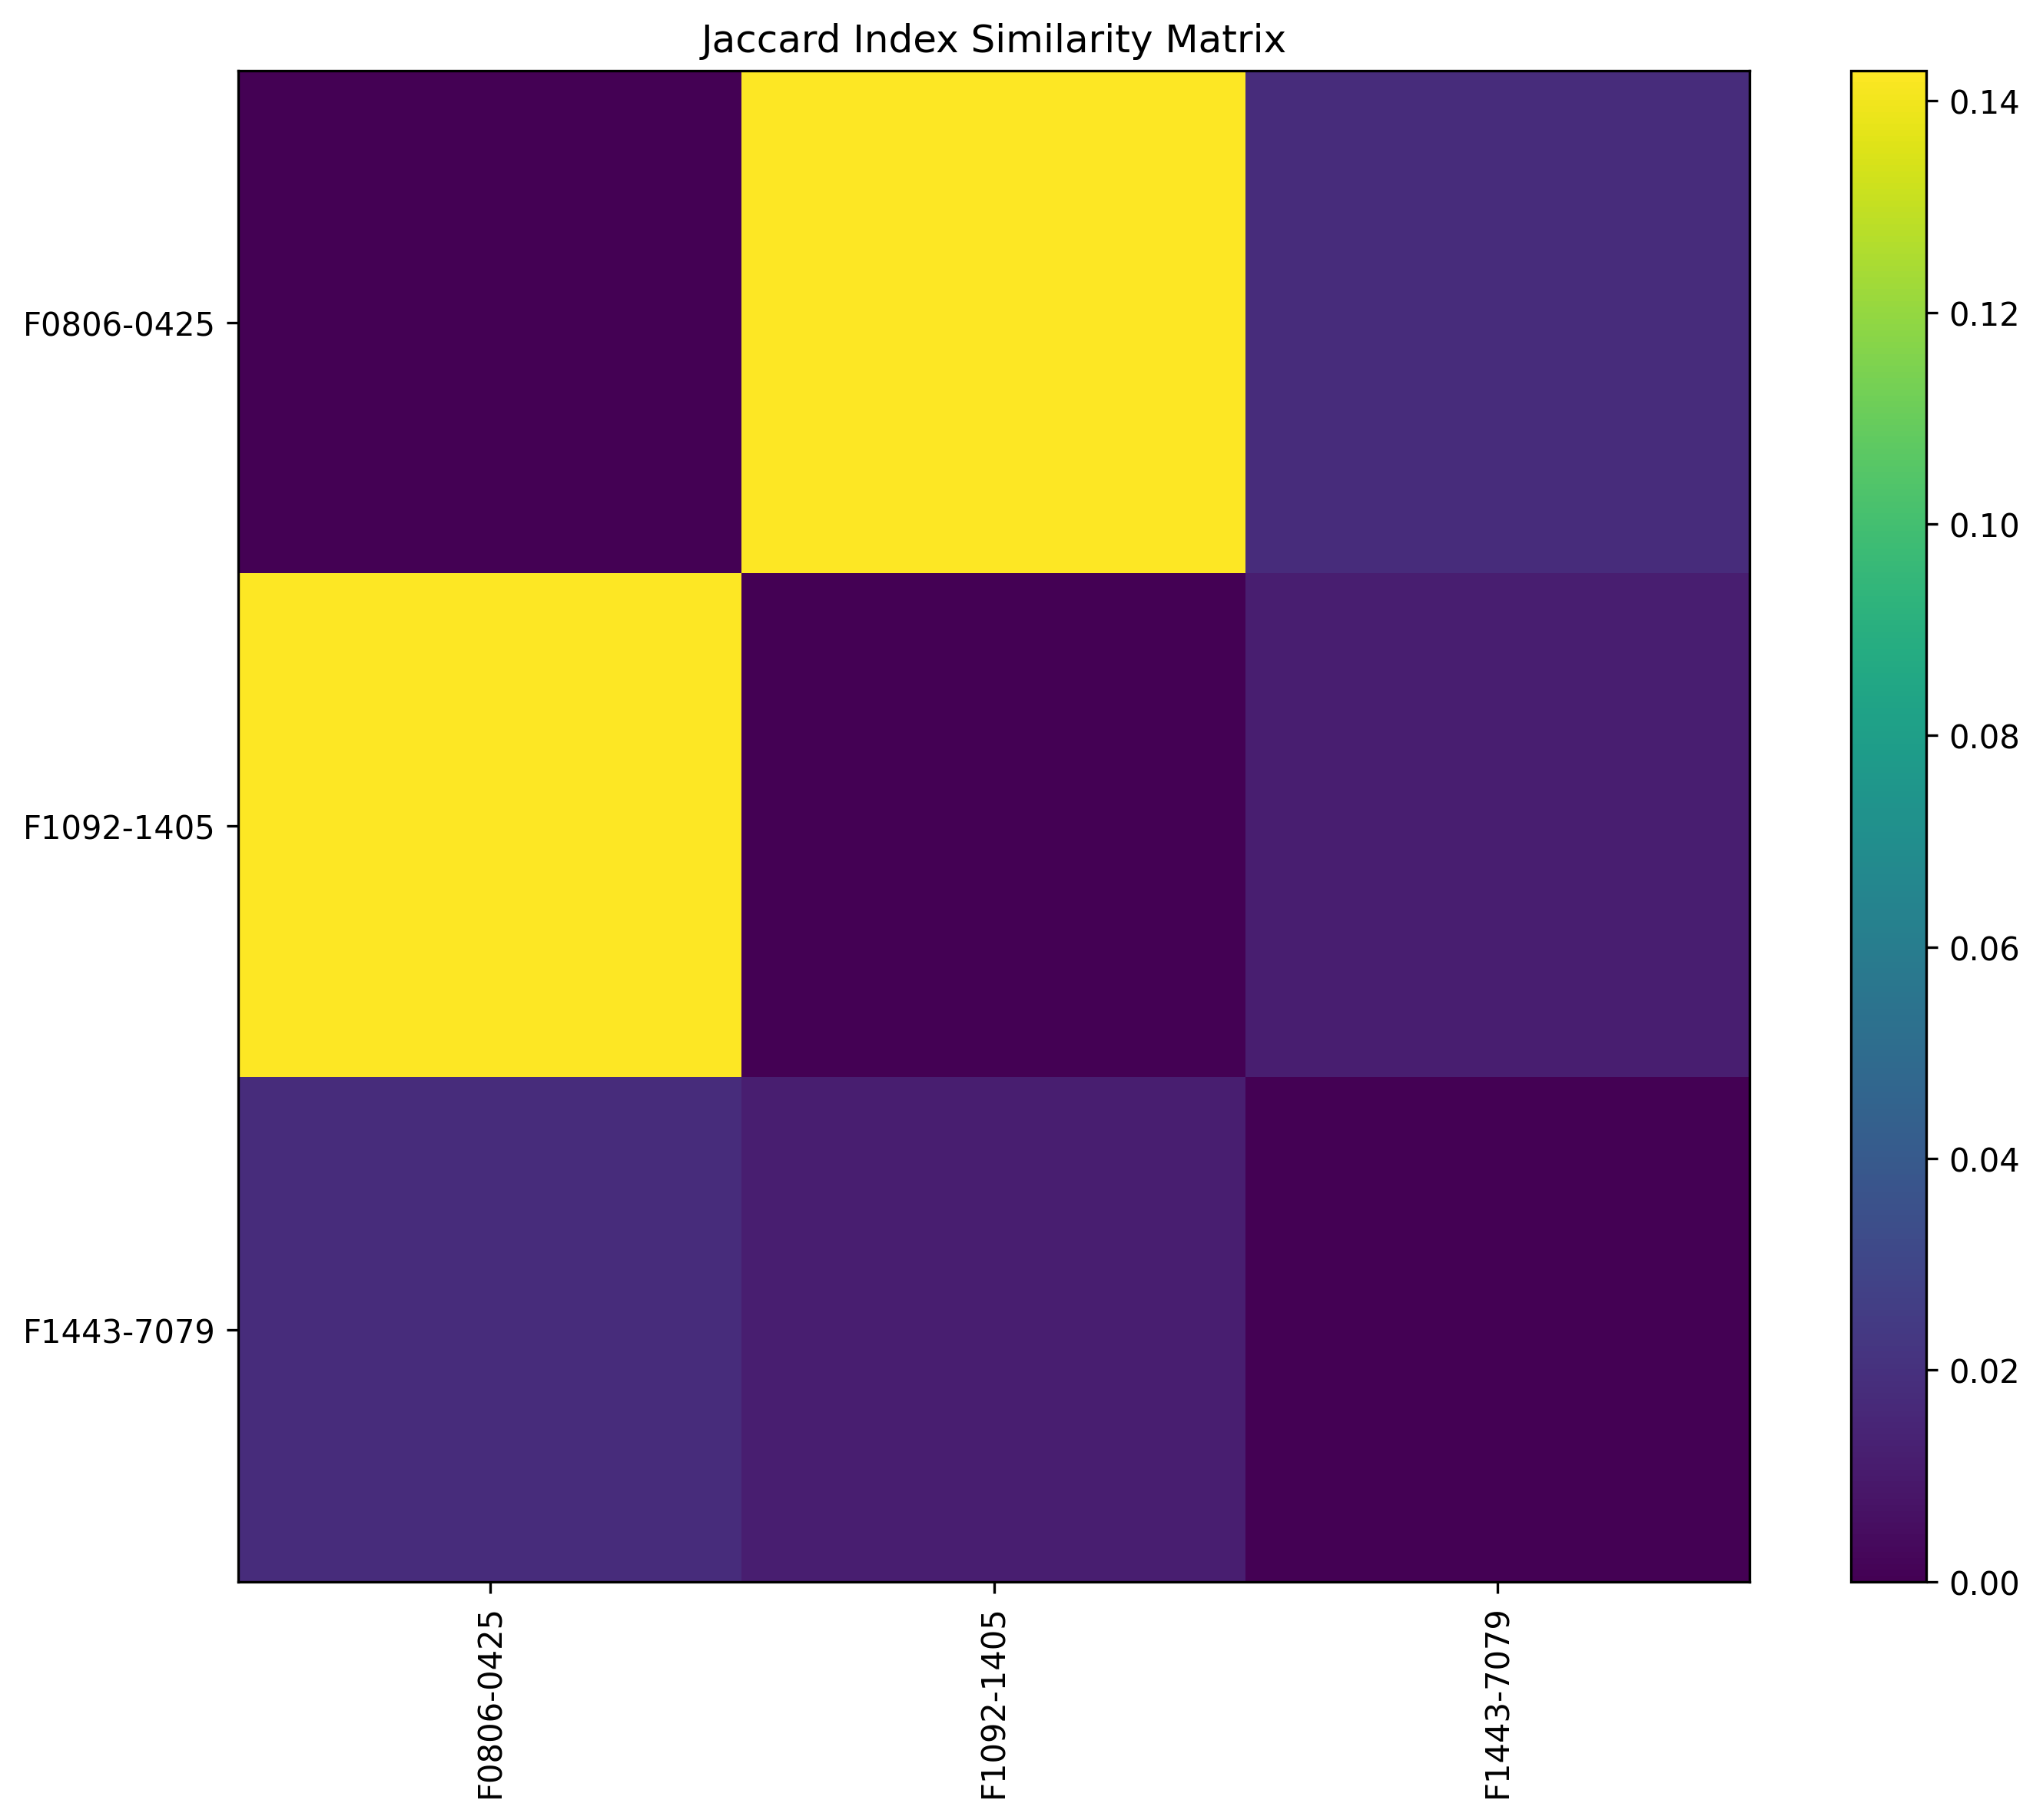

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the common columns GeneSymbol and Compound
common_columns = ['GeneSymbol', 'Compound']
df1 = file1[common_columns]
df2 = file2[common_columns]
df3 = file3[common_columns]

# Concatenate all dataframes
combined_df = pd.concat([df1, df2, df3])

# Save the combined columns into a new CSV file
combined_df.to_csv('combined_gene_compound.csv', index=False)

# Create a dictionary to map each Compound to its set of GeneSymbols
compound_to_genes = combined_df.groupby('Compound')['GeneSymbol'].apply(set).to_dict()

# Get list of all unique compounds
compounds = list(compound_to_genes.keys())

# Initialize Jaccard similarity matrix
jaccard_matrix = np.zeros((len(compounds), len(compounds)))

# Calculate Jaccard index for each pair of compounds
for i, j in itertools.combinations(range(len(compounds)), 2):
    jaccard_matrix[i, j] = jaccard_index(compound_to_genes[compounds[i]], compound_to_genes[compounds[j]])
    jaccard_matrix[j, i] = jaccard_matrix[i, j]

# Create a DataFrame for the Jaccard index matrix
jaccard_df = pd.DataFrame(jaccard_matrix, index=compounds, columns=compounds)

# Save the Jaccard index matrix to a new CSV file
jaccard_df.to_csv('jaccard_index_matrix.csv')

# Plot the Jaccard index matrix
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(jaccard_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Jaccard Index Similarity Matrix')
plt.tight_layout()
plt.savefig('jaccard_index_matrix.png', dpi=300)
plt.show()

/tmp/ipykernel_3946867/1809036573.py:52: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(jaccard_matrix, method='ward')


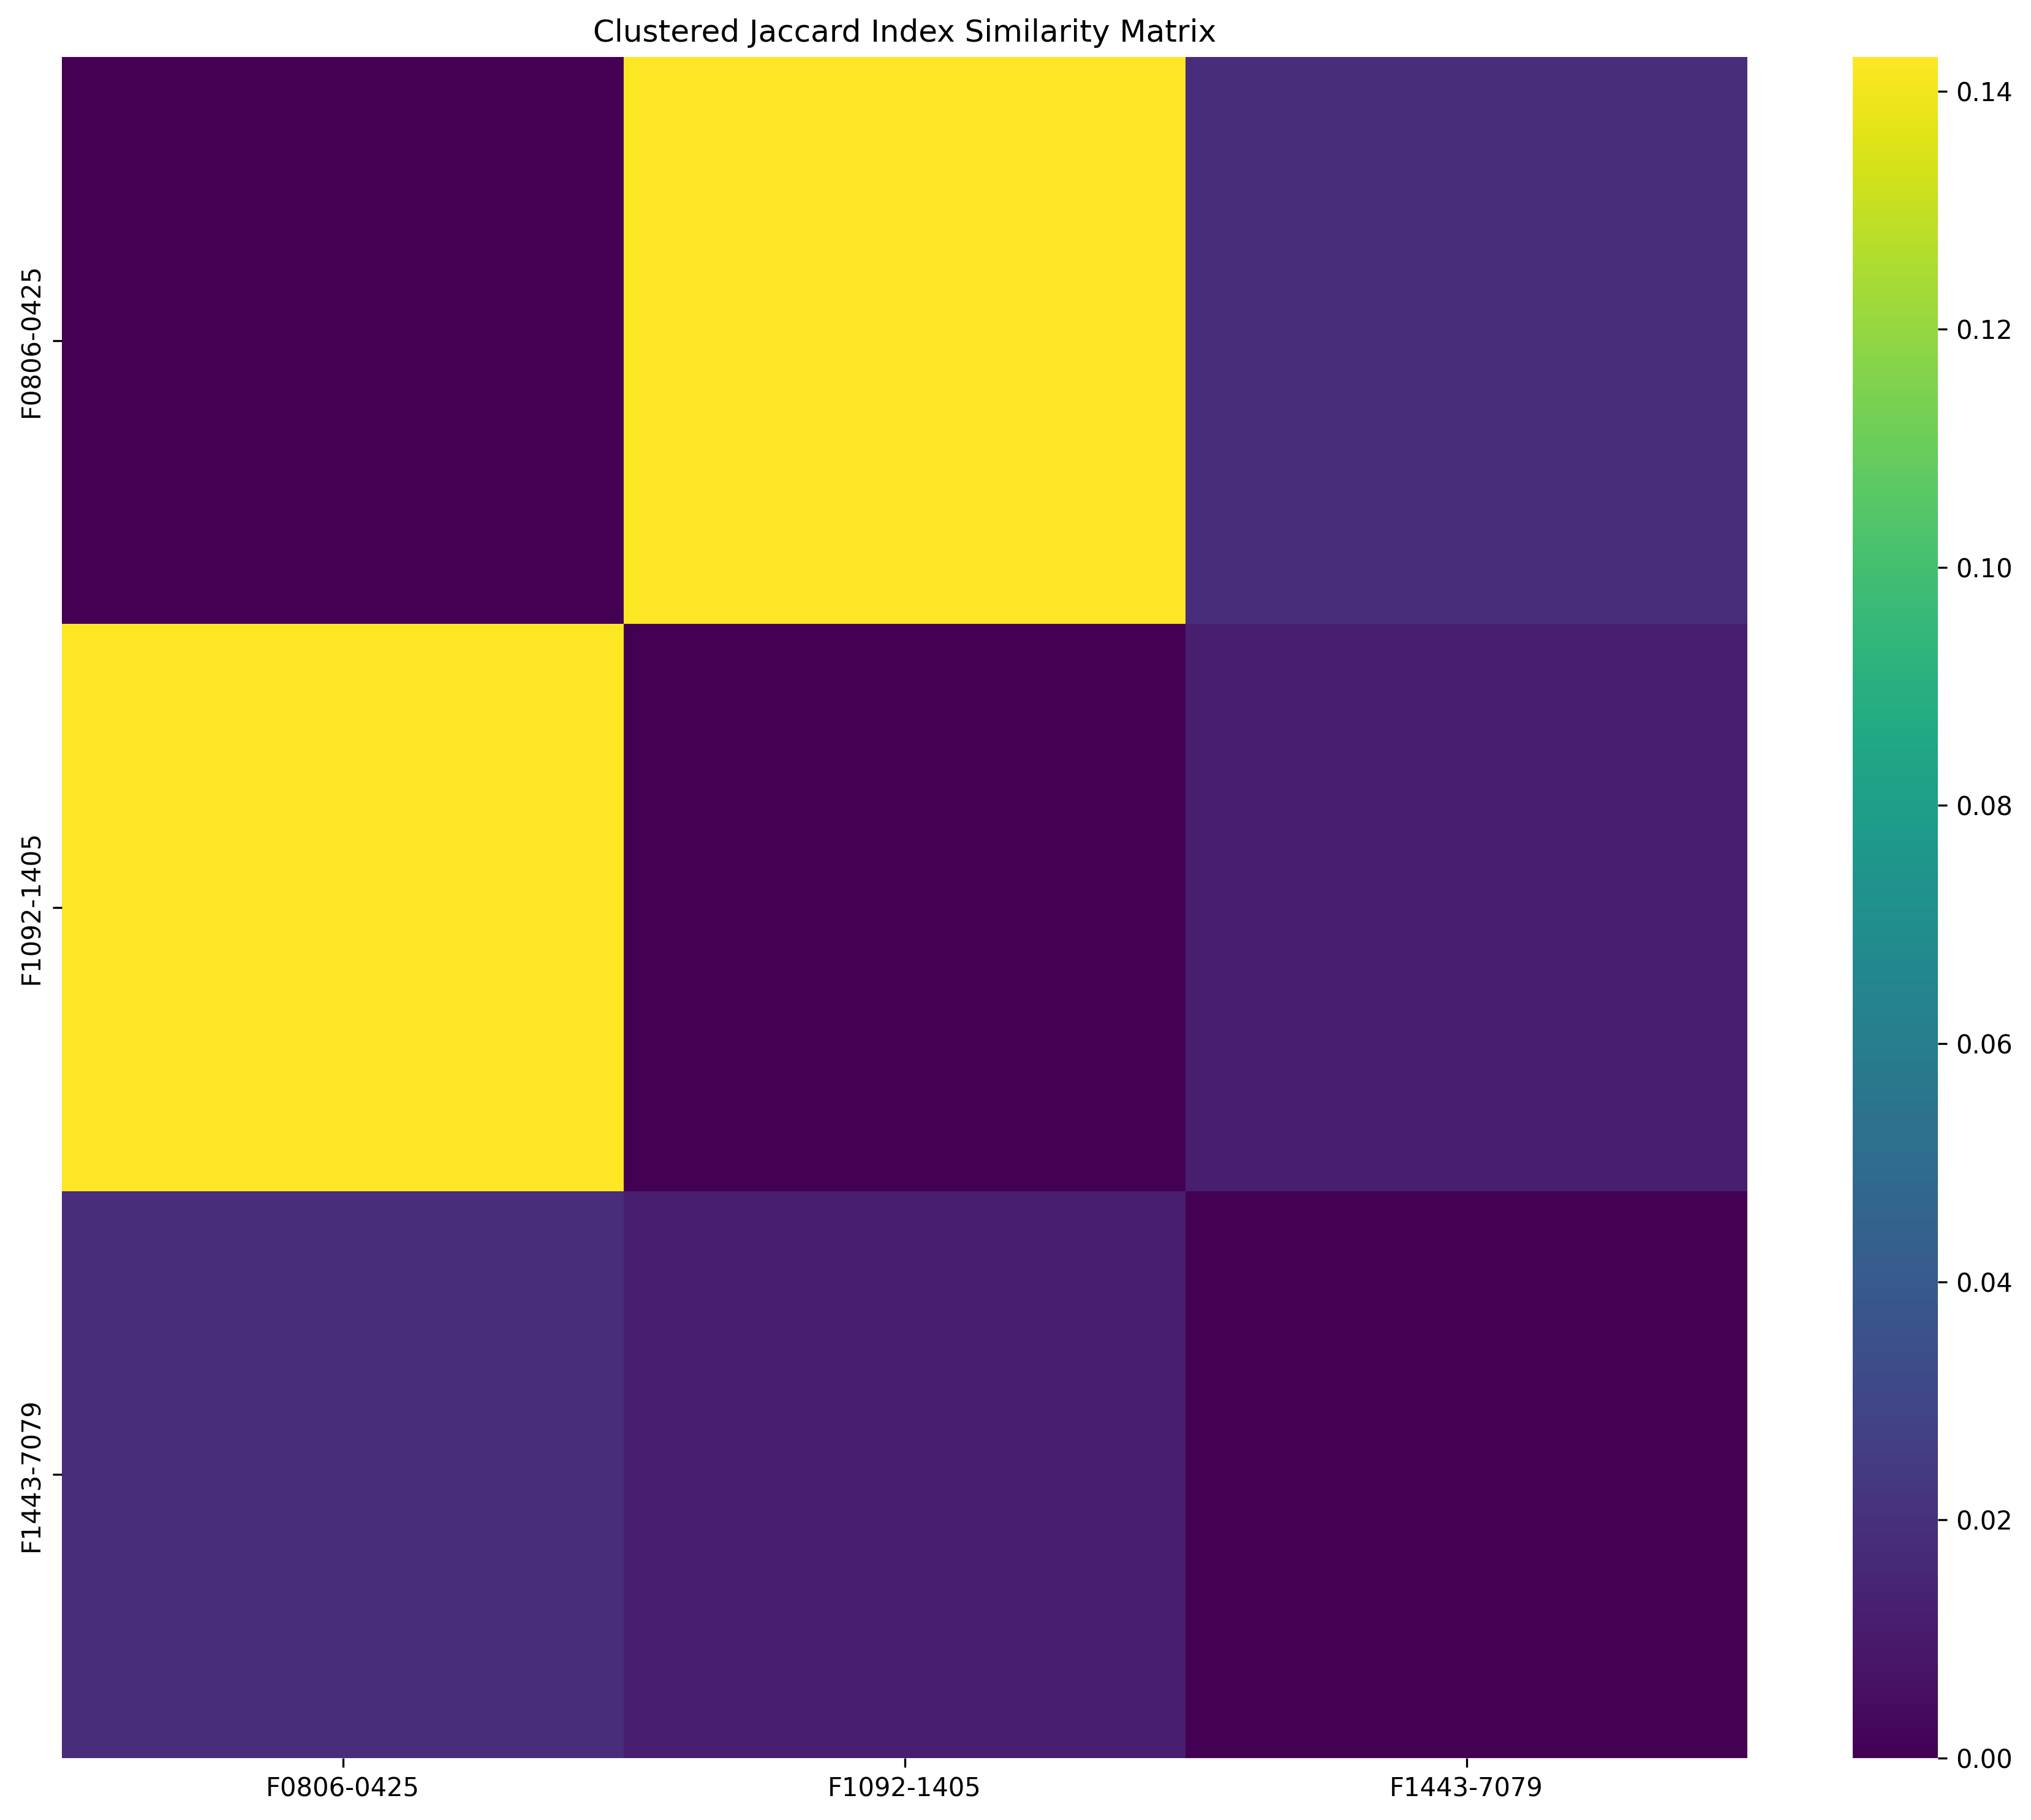

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the common columns GeneSymbol and Compound
common_columns = ['GeneSymbol', 'Compound']
df1 = file1[common_columns]
df2 = file2[common_columns]
df3 = file3[common_columns]

# Concatenate all dataframes
combined_df = pd.concat([df1, df2, df3])

# Save the combined columns into a new CSV file
combined_df.to_csv('combined_gene_compound.csv', index=False)

# Create a dictionary to map each Compound to its set of GeneSymbols
compound_to_genes = combined_df.groupby('Compound')['GeneSymbol'].apply(set).to_dict()

# Get list of all unique compounds
compounds = list(compound_to_genes.keys())

# Initialize Jaccard similarity matrix
jaccard_matrix = np.zeros((len(compounds), len(compounds)))

# Calculate Jaccard index for each pair of compounds
for i, j in itertools.combinations(range(len(compounds)), 2):
    jaccard_matrix[i, j] = jaccard_index(compound_to_genes[compounds[i]], compound_to_genes[compounds[j]])
    jaccard_matrix[j, i] = jaccard_matrix[i, j]

# Create a DataFrame for the Jaccard index matrix
jaccard_df = pd.DataFrame(jaccard_matrix, index=compounds, columns=compounds)

# Save the Jaccard index matrix to a new CSV file
jaccard_df.to_csv('jaccard_index_matrix.csv')

# Perform hierarchical clustering
linkage_matrix = linkage(jaccard_matrix, method='ward')
dendro = dendrogram(linkage_matrix, labels=compounds, no_plot=True)
ordered_compounds = leaves_list(linkage_matrix)

# Reorder the Jaccard matrix according to the clustering
ordered_jaccard_matrix = jaccard_df.iloc[ordered_compounds, ordered_compounds]

# Plot the clustered Jaccard index matrix
plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(ordered_jaccard_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title('Clustered Jaccard Index Similarity Matrix')
plt.tight_layout()
plt.savefig('clustered_jaccard_index_matrix.png', dpi=300)
plt.show()

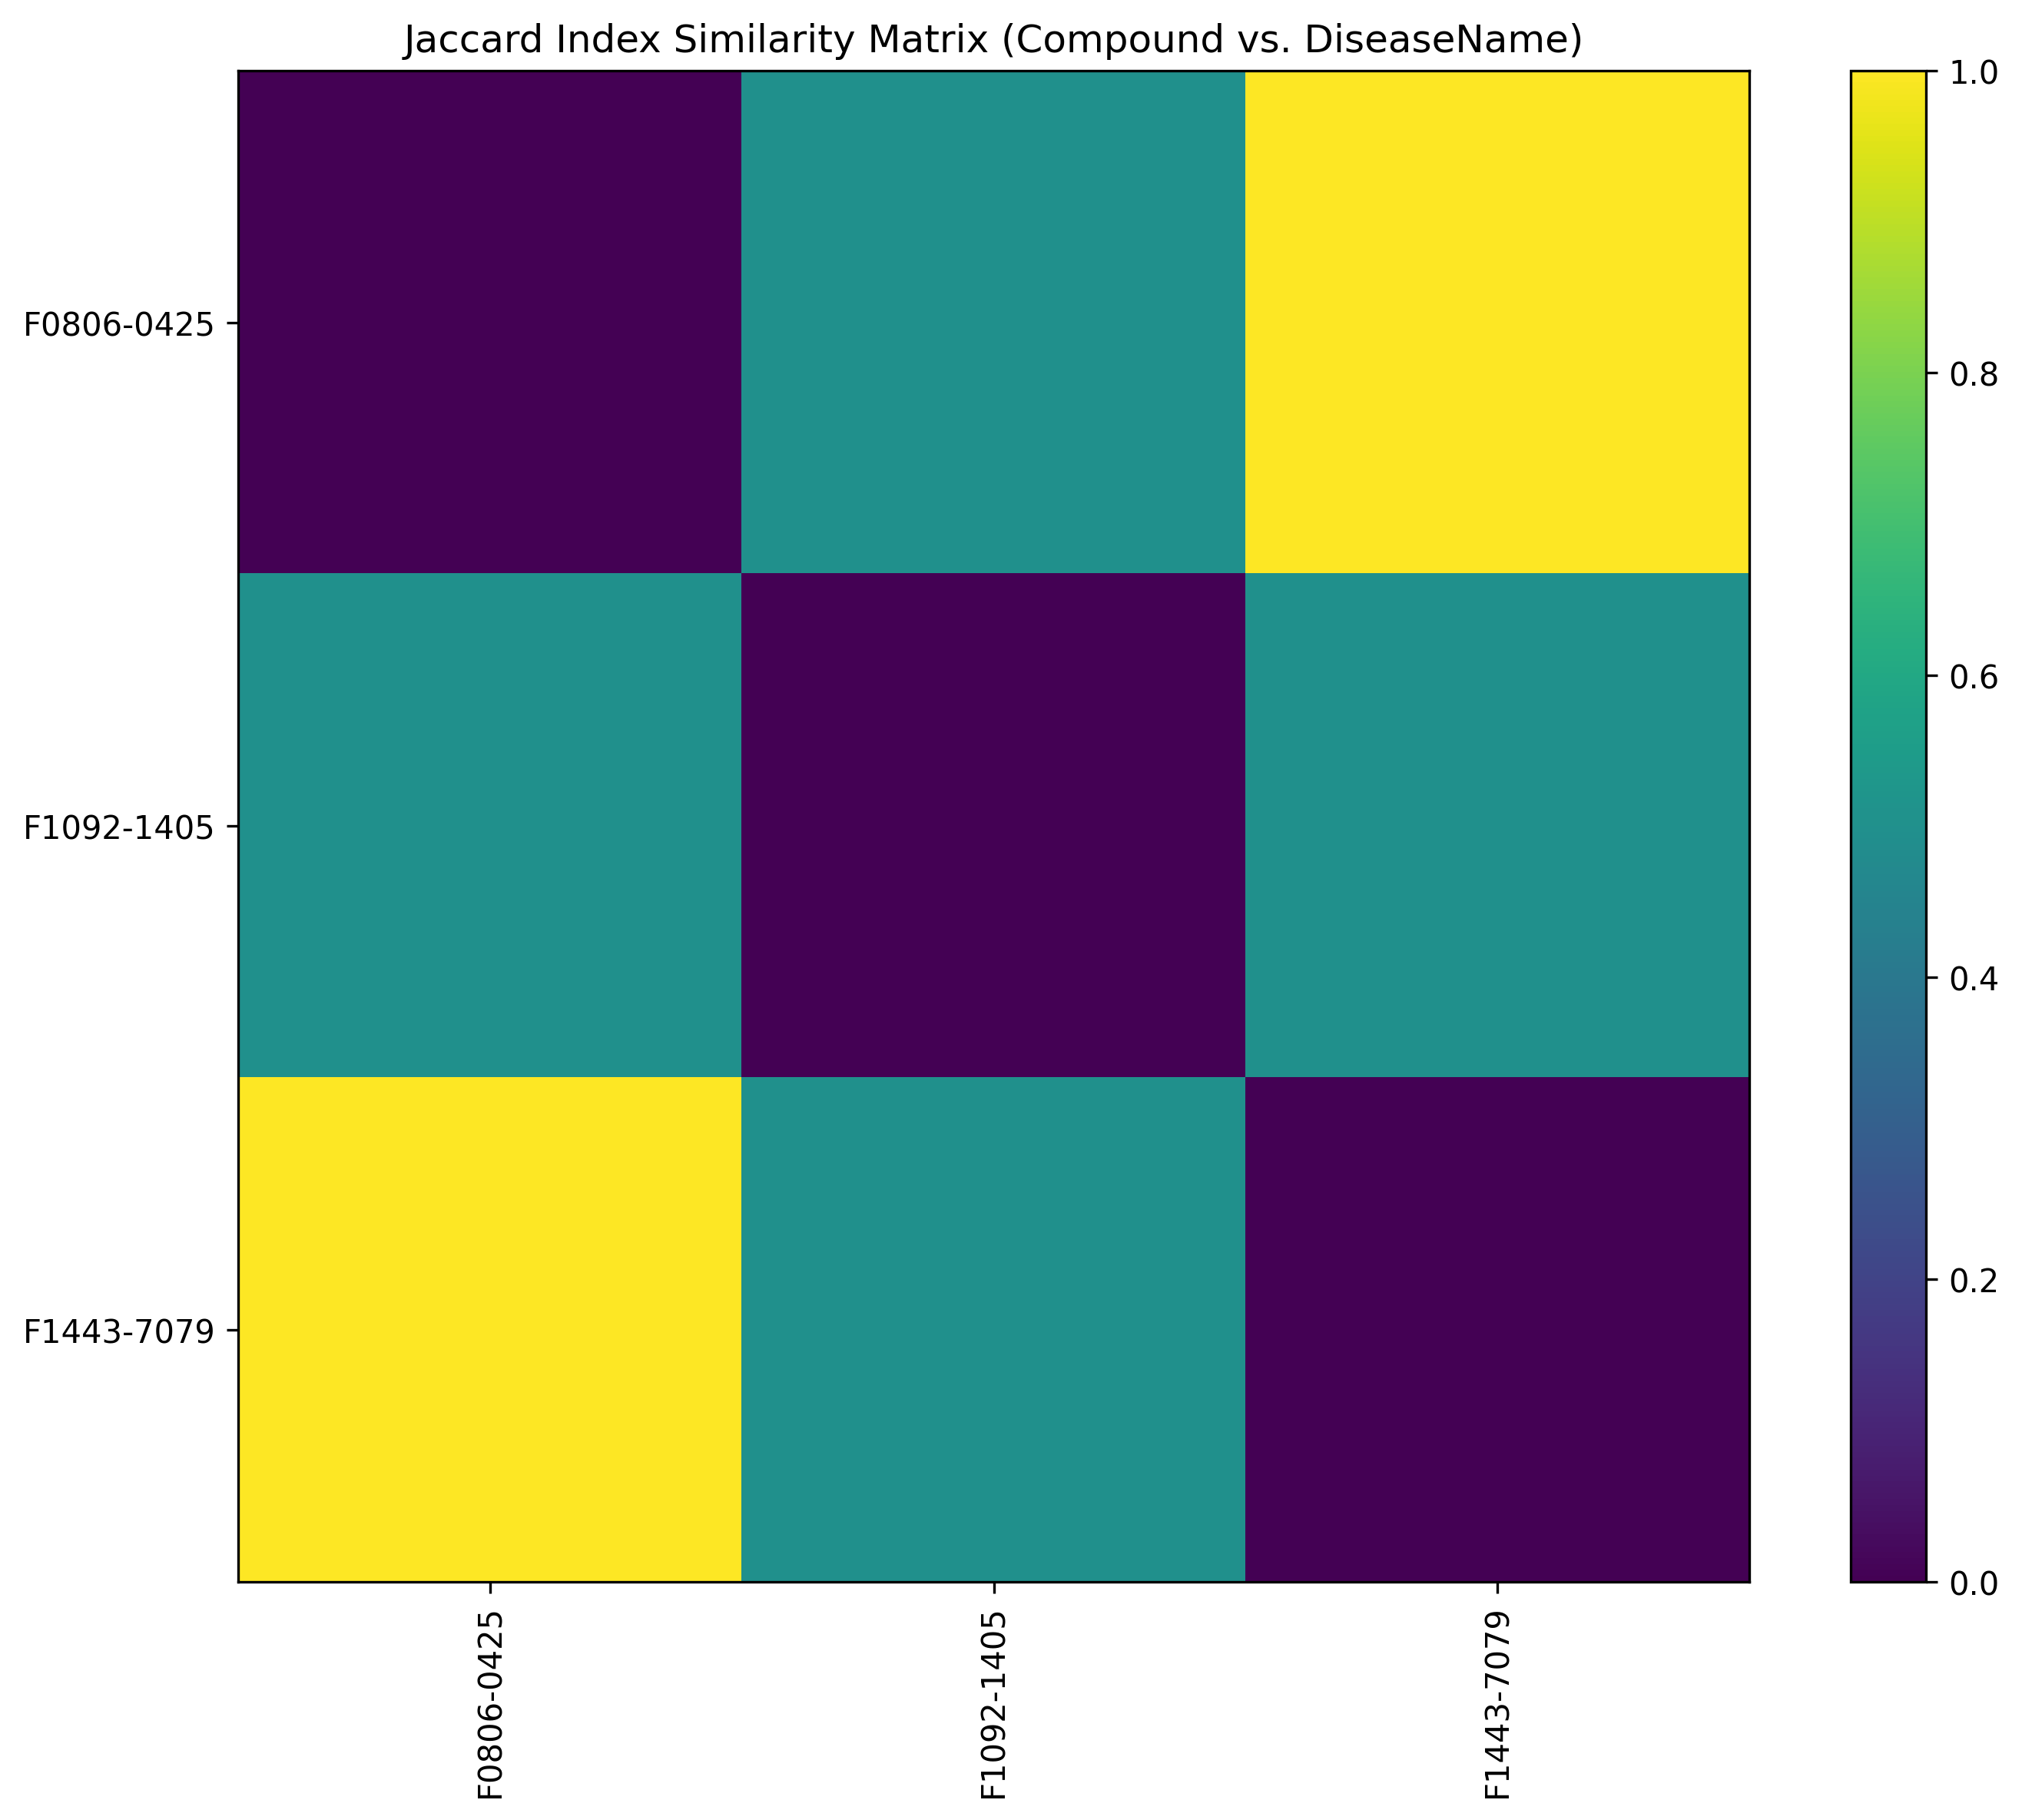

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the common columns Compound and DiseaseName
common_columns = ['Compound', 'Disease Name']
df1 = file1[common_columns]
df2 = file2[common_columns]
df3 = file3[common_columns]

# Concatenate all dataframes
combined_df = pd.concat([df1, df2, df3])

# Save the combined columns into a new CSV file
combined_df.to_csv('combined_compound_disease.csv', index=False)

# Create a dictionary to map each Compound to its set of DiseaseNames
compound_to_diseases = combined_df.groupby('Compound')['Disease Name'].apply(set).to_dict()

# Get list of all unique compounds
compounds = list(compound_to_diseases.keys())

# Initialize Jaccard similarity matrix
jaccard_matrix = np.zeros((len(compounds), len(compounds)))

# Calculate Jaccard index for each pair of compounds
for i, j in itertools.combinations(range(len(compounds)), 2):
    jaccard_matrix[i, j] = jaccard_index(compound_to_diseases[compounds[i]], compound_to_diseases[compounds[j]])
    jaccard_matrix[j, i] = jaccard_matrix[i, j]

# Create a DataFrame for the Jaccard index matrix
jaccard_df = pd.DataFrame(jaccard_matrix, index=compounds, columns=compounds)

# Save the Jaccard index matrix to a new CSV file
jaccard_df.to_csv('jaccard_index_matrix_compound_disease.csv')

# Plot the Jaccard index matrix
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(jaccard_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Jaccard Index Similarity Matrix (Compound vs. DiseaseName)')
plt.tight_layout()
plt.savefig('jaccard_index_matrix_compound_disease.png', dpi=300)
plt.show()

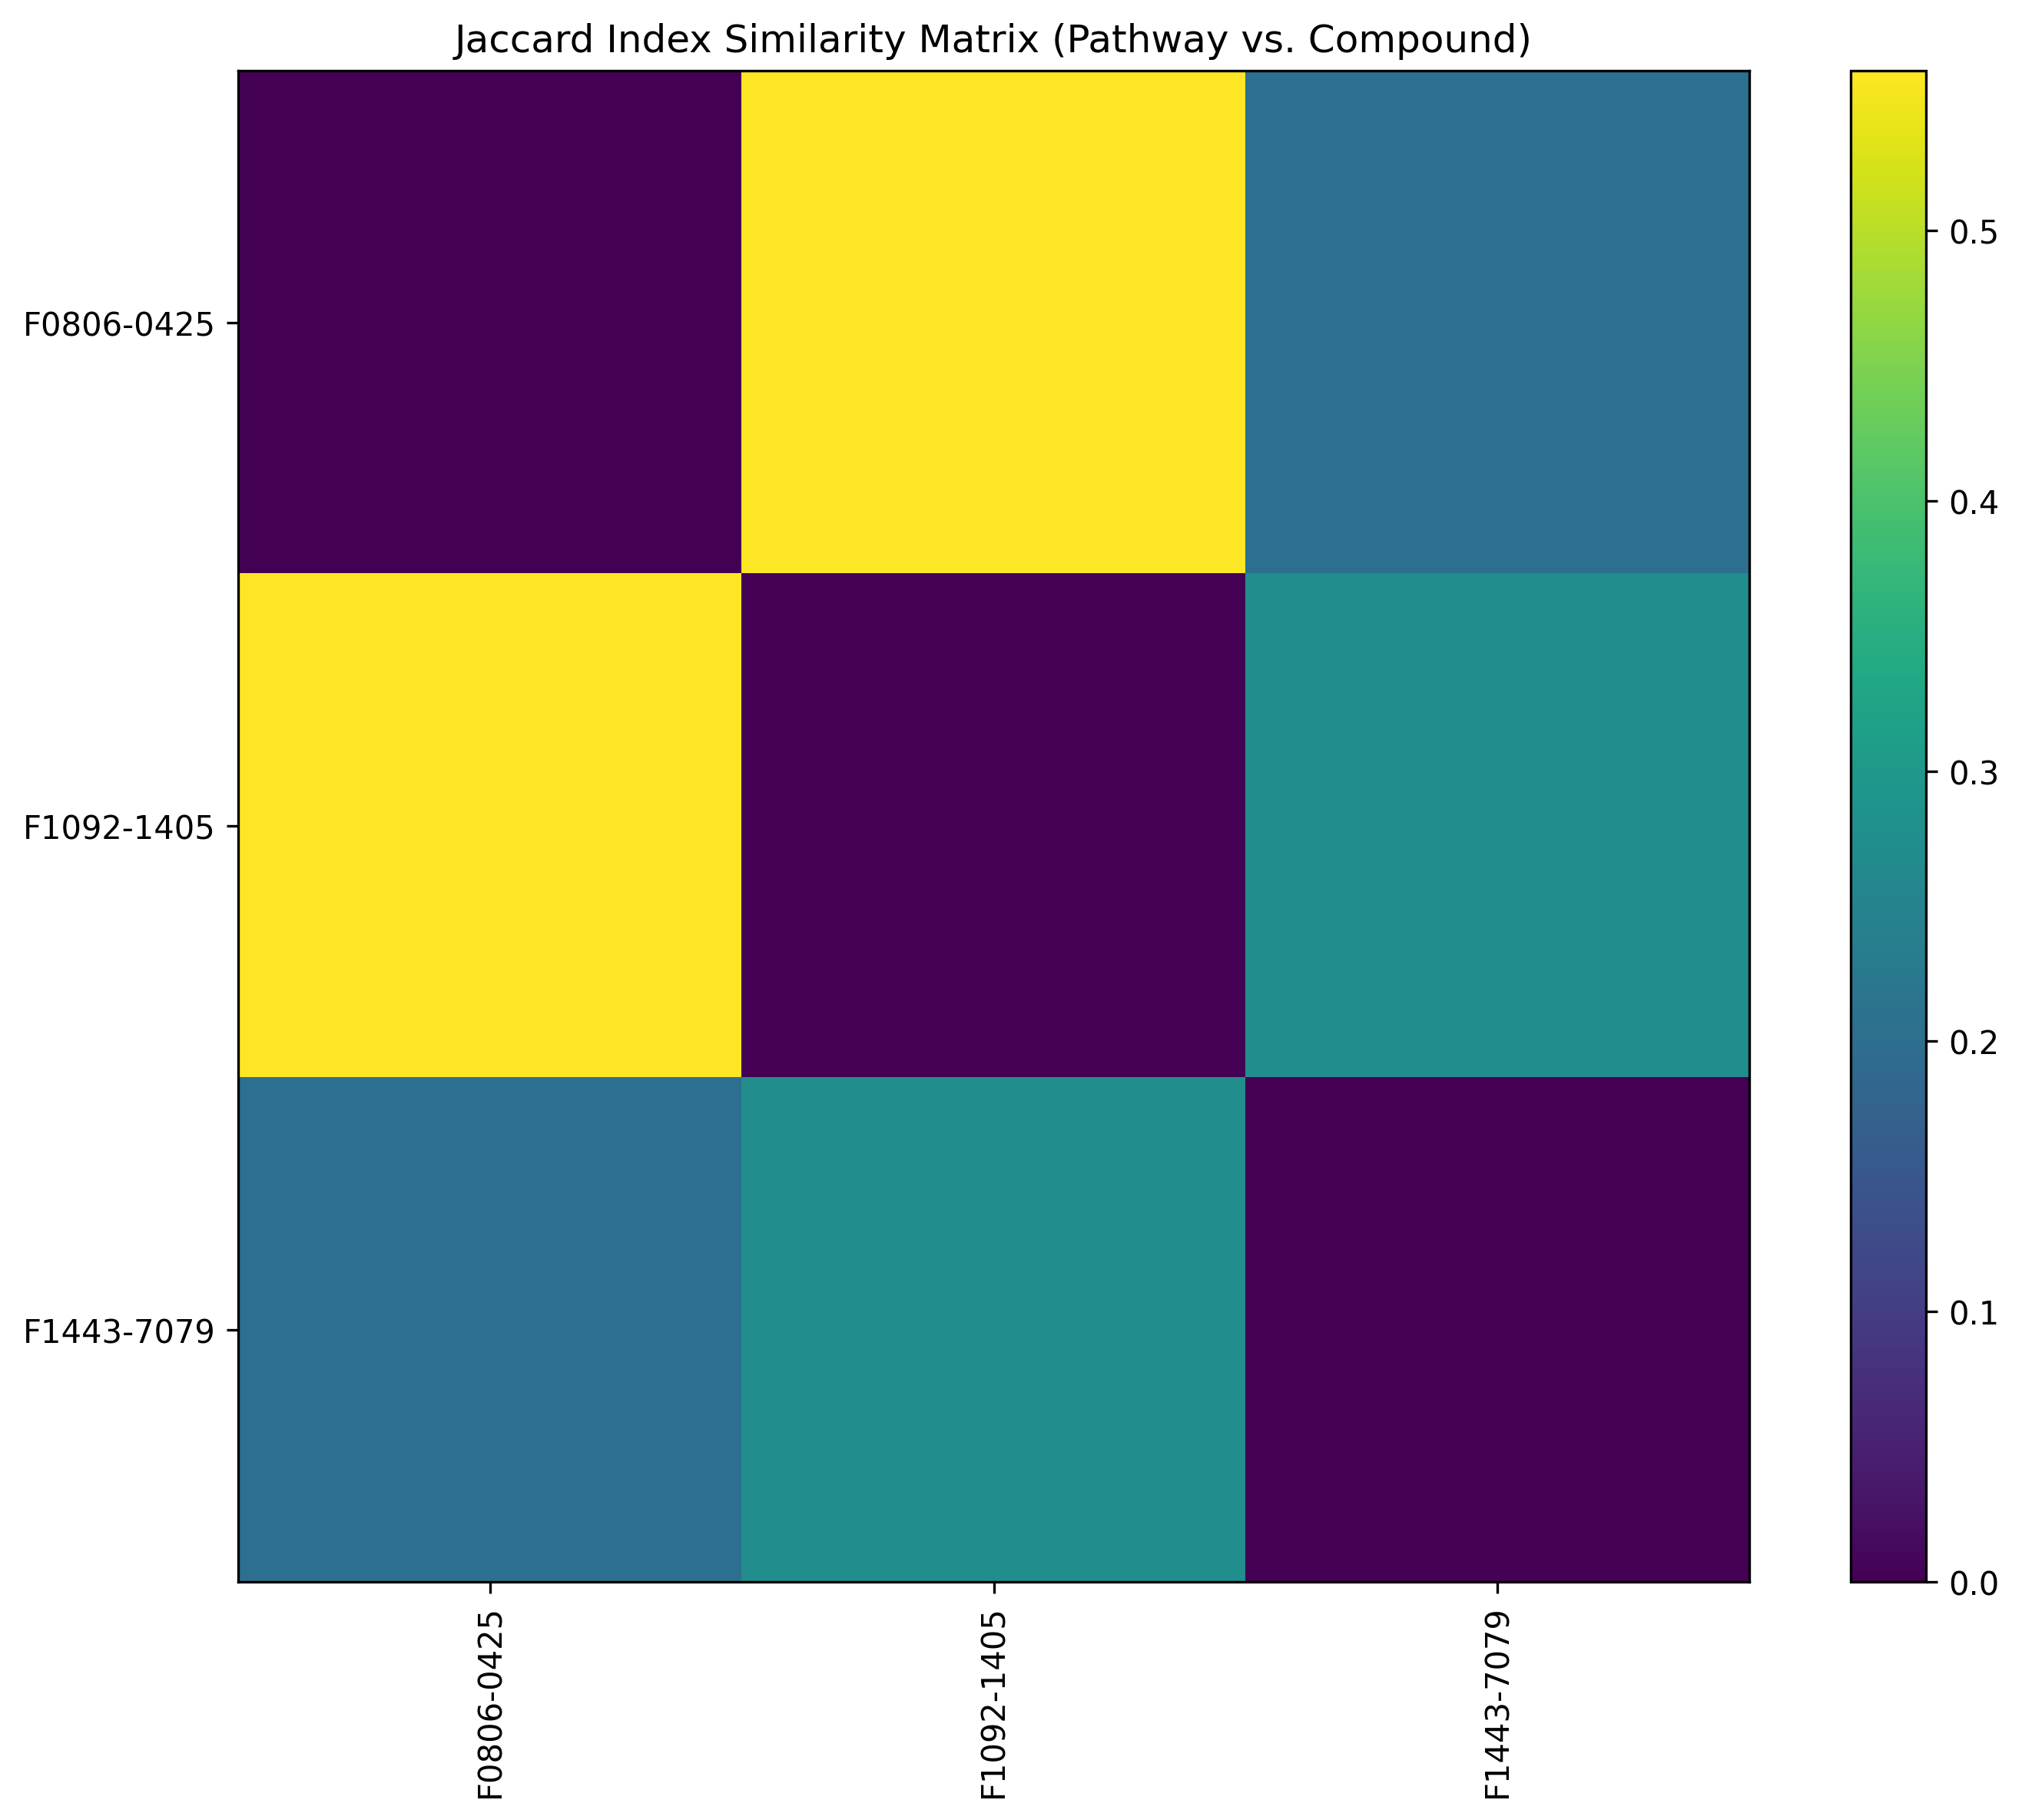

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the common columns Pathway and Compound
common_columns = ['Pathway', 'Compound']
df1 = file1[common_columns]
df2 = file2[common_columns]
df3 = file3[common_columns]

# Concatenate all dataframes
combined_df = pd.concat([df1, df2, df3])

# Save the combined columns into a new CSV file
combined_df.to_csv('combined_pathway_compound.csv', index=False)

# Create a dictionary to map each Compound to its set of Pathways
compound_to_pathways = combined_df.groupby('Compound')['Pathway'].apply(set).to_dict()

# Get list of all unique compounds
compounds = list(compound_to_pathways.keys())

# Initialize Jaccard similarity matrix
jaccard_matrix = np.zeros((len(compounds), len(compounds)))

# Calculate Jaccard index for each pair of compounds
for i, j in itertools.combinations(range(len(compounds)), 2):
    jaccard_matrix[i, j] = jaccard_index(compound_to_pathways[compounds[i]], compound_to_pathways[compounds[j]])
    jaccard_matrix[j, i] = jaccard_matrix[i, j]

# Create a DataFrame for the Jaccard index matrix
jaccard_df = pd.DataFrame(jaccard_matrix, index=compounds, columns=compounds)

# Save the Jaccard index matrix to a new CSV file
jaccard_df.to_csv('jaccard_index_matrix_pathway_compound.csv')

# Plot the Jaccard index matrix
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(jaccard_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Jaccard Index Similarity Matrix (Pathway vs. Compound)')
plt.tight_layout()
plt.savefig('jaccard_index_matrix_pathway_compound.png', dpi=300)
plt.show()

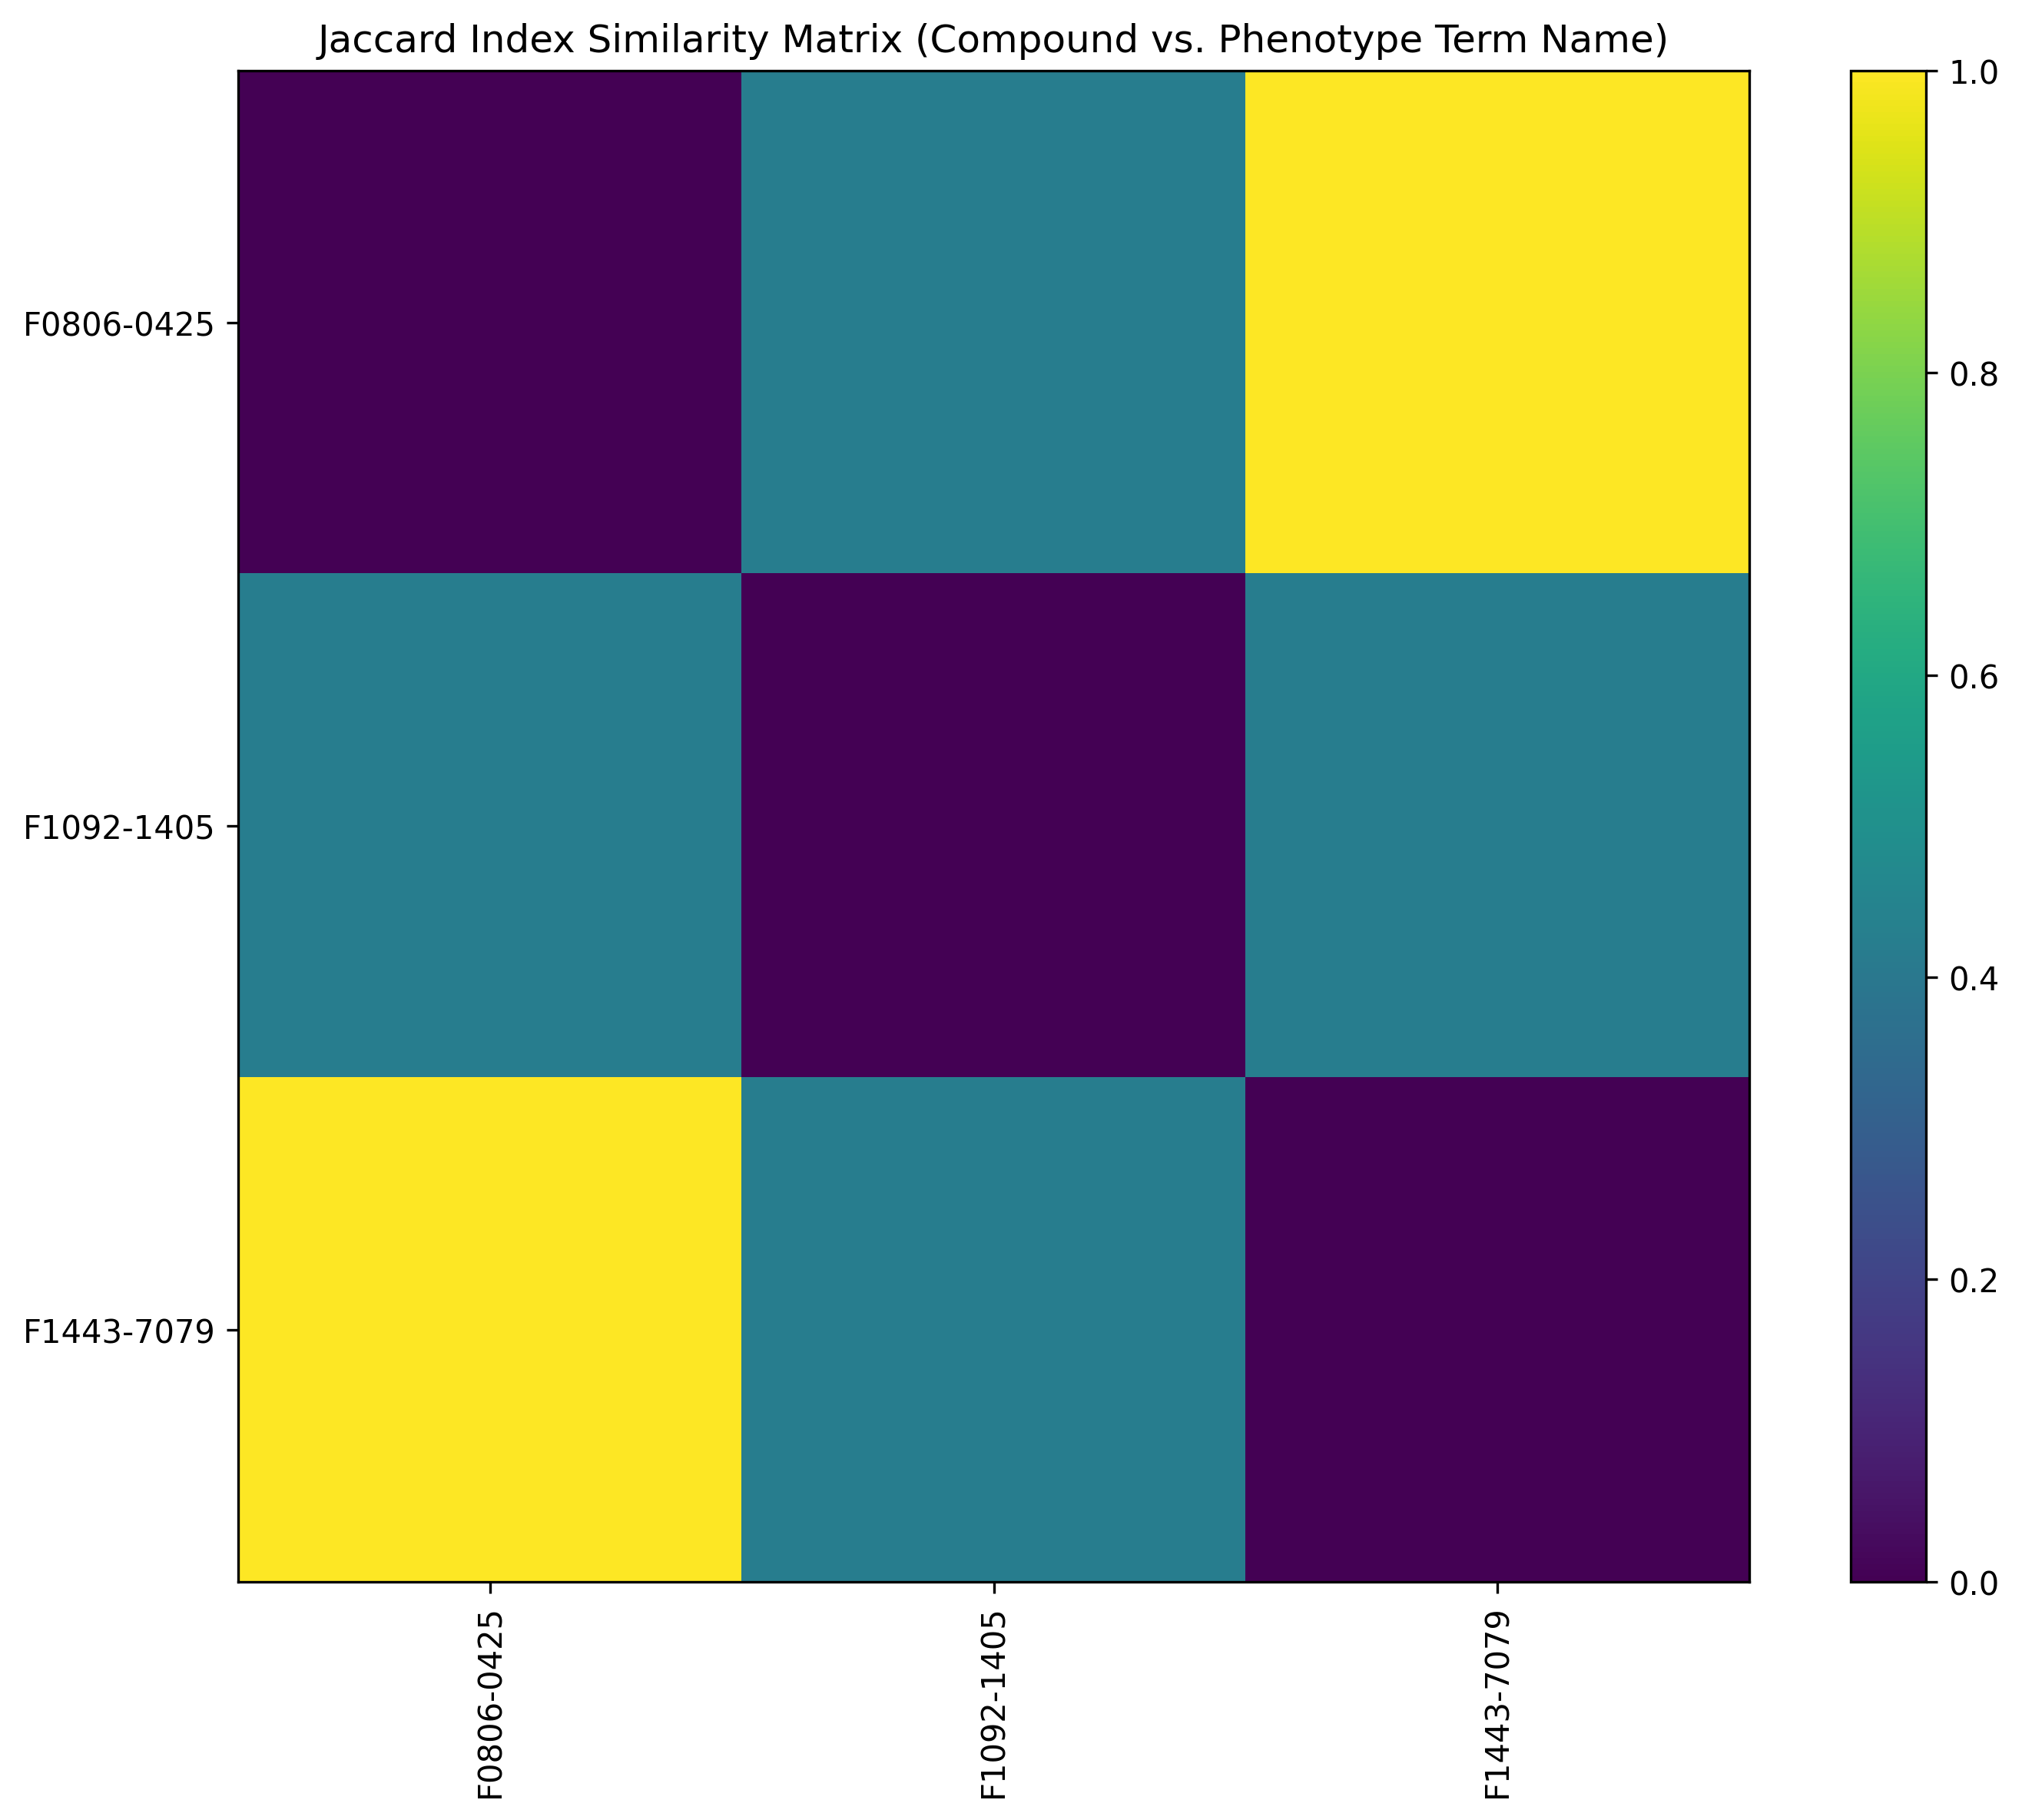

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the common columns Compound and Phenotype Term Name
common_columns = ['Compound', 'Phenotype Term Name']
df1 = file1[common_columns]
df2 = file2[common_columns]
df3 = file3[common_columns]

# Concatenate all dataframes
combined_df = pd.concat([df1, df2, df3])

# Save the combined columns into a new CSV file
combined_df.to_csv('combined_compound_phenotype.csv', index=False)

# Create a dictionary to map each Compound to its set of Phenotype Term Names
compound_to_phenotypes = combined_df.groupby('Compound')['Phenotype Term Name'].apply(set).to_dict()

# Get list of all unique compounds
compounds = list(compound_to_phenotypes.keys())

# Initialize Jaccard similarity matrix
jaccard_matrix = np.zeros((len(compounds), len(compounds)))

# Calculate Jaccard index for each pair of compounds
for i, j in itertools.combinations(range(len(compounds)), 2):
    jaccard_matrix[i, j] = jaccard_index(compound_to_phenotypes[compounds[i]], compound_to_phenotypes[compounds[j]])
    jaccard_matrix[j, i] = jaccard_matrix[i, j]

# Create a DataFrame for the Jaccard index matrix
jaccard_df = pd.DataFrame(jaccard_matrix, index=compounds, columns=compounds)

# Save the Jaccard index matrix to a new CSV file
jaccard_df.to_csv('jaccard_index_matrix_compound_phenotype.csv')

# Plot the Jaccard index matrix
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(jaccard_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Jaccard Index Similarity Matrix (Compound vs. Phenotype Term Name)')
plt.tight_layout()
plt.savefig('jaccard_index_matrix_compound_phenotype.png', dpi=300)
plt.show()

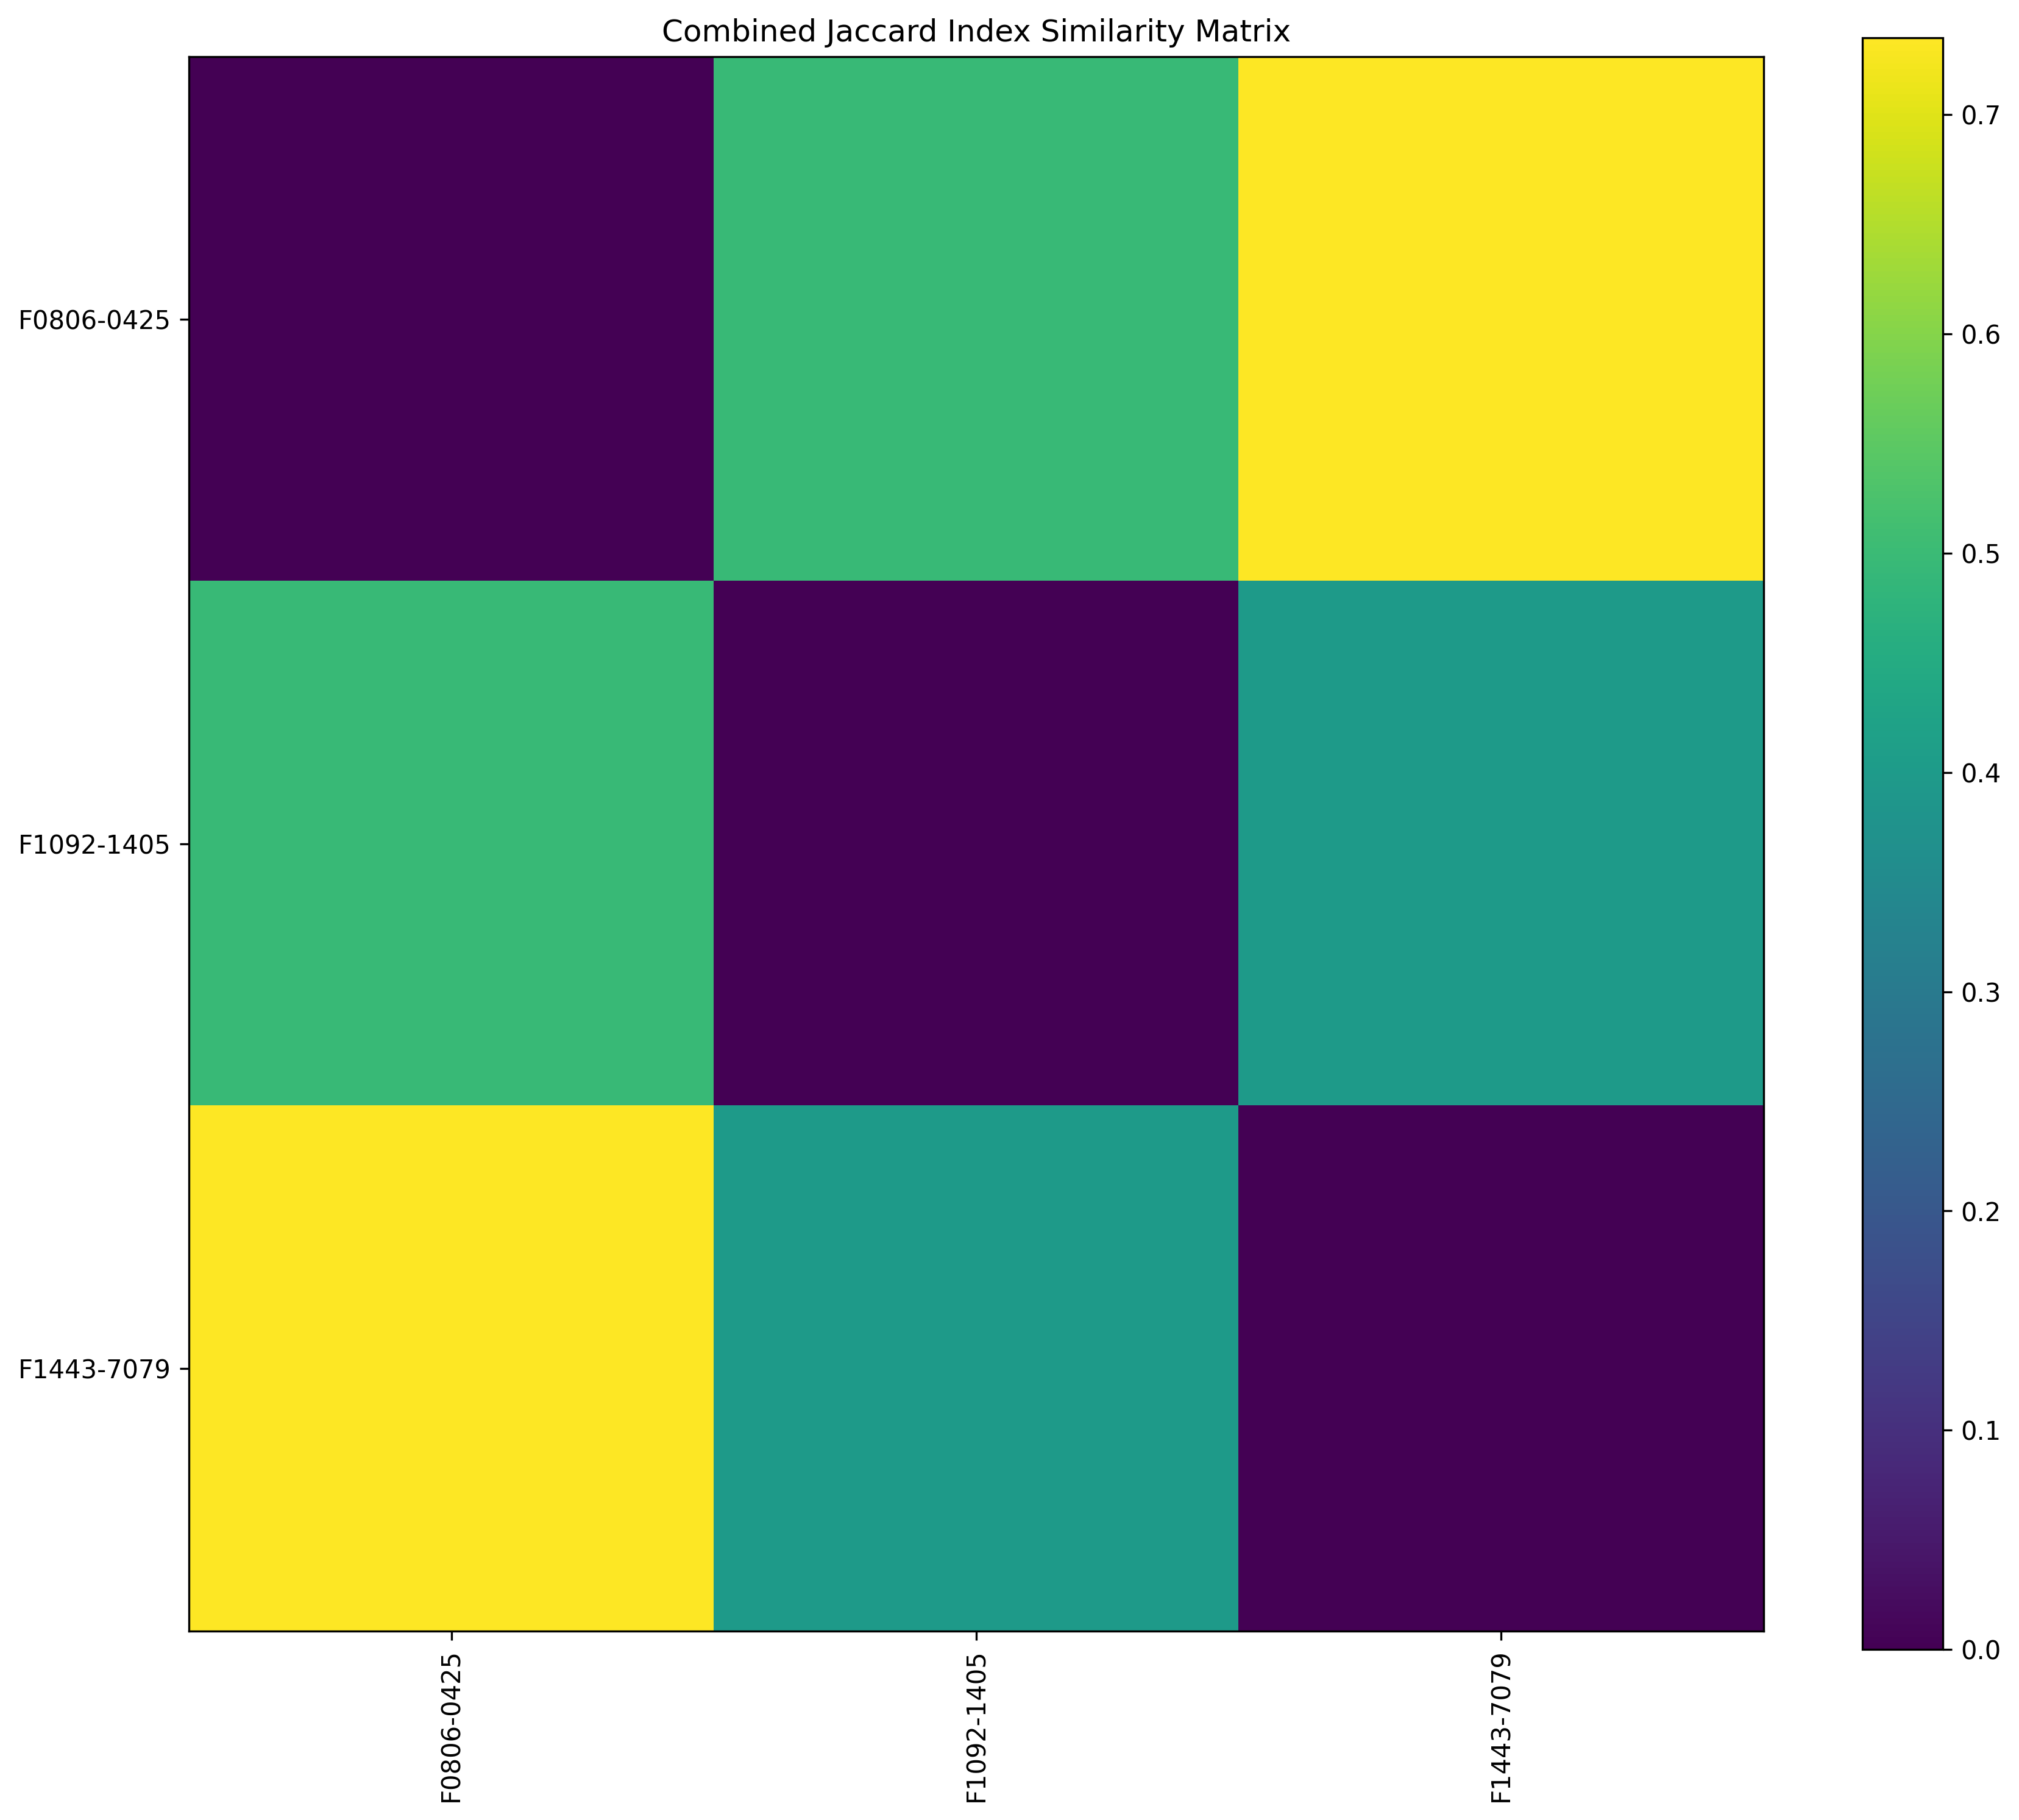

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to create Jaccard matrix from combined data
def create_jaccard_matrix(combined_df, group_column, element_column):
    group_to_elements = combined_df.groupby(group_column)[element_column].apply(set).to_dict()
    groups = list(group_to_elements.keys())
    jaccard_matrix = np.zeros((len(groups), len(groups)))
    for i, j in itertools.combinations(range(len(groups)), 2):
        jaccard_matrix[i, j] = jaccard_index(group_to_elements[groups[i]], group_to_elements[groups[j]])
        jaccard_matrix[j, i] = jaccard_matrix[i, j]
    jaccard_df = pd.DataFrame(jaccard_matrix, index=groups, columns=groups)
    return jaccard_df

# Load the CSV files
file1 = pd.read_csv('GCA_comp1.csv')
file2 = pd.read_csv('GCA_comp2.csv')
file3 = pd.read_csv('GCA_comp3.csv')

# Extract the relevant columns for each matrix
common_columns1 = ['Compound', 'Phenotype Term Name']
common_columns2 = ['Compound', 'Disease Name']
common_columns3 = ['Pathway', 'Compound']

# Combine the columns for each matrix
df1 = pd.concat([file1[common_columns1], file2[common_columns1], file3[common_columns1]])
df2 = pd.concat([file1[common_columns2], file2[common_columns2], file3[common_columns2]])
df3 = pd.concat([file1[common_columns3], file2[common_columns3], file3[common_columns3]])

# Create Jaccard matrices
jaccard_df1 = create_jaccard_matrix(df1, 'Compound', 'Phenotype Term Name')
jaccard_df2 = create_jaccard_matrix(df2, 'Compound', 'Disease Name')
jaccard_df3 = create_jaccard_matrix(df3, 'Compound', 'Pathway')

# Ensure all matrices have the same order of compounds
compounds = sorted(set(jaccard_df1.index) | set(jaccard_df2.index) | set(jaccard_df3.index))
jaccard_df1 = jaccard_df1.reindex(index=compounds, columns=compounds).fillna(0)
jaccard_df2 = jaccard_df2.reindex(index=compounds, columns=compounds).fillna(0)
jaccard_df3 = jaccard_df3.reindex(index=compounds, columns=compounds).fillna(0)

# Average the Jaccard matrices
combined_jaccard_matrix = (jaccard_df1.values + jaccard_df2.values + jaccard_df3.values) / 3

# Create a DataFrame for the combined Jaccard matrix
combined_jaccard_df = pd.DataFrame(combined_jaccard_matrix, index=compounds, columns=compounds)

# Save the combined Jaccard matrix to a new CSV file
combined_jaccard_df.to_csv('combined_jaccard_matrix.csv')

# Plot the combined Jaccard matrix
plt.figure(figsize=(12, 10), dpi=300)
plt.imshow(combined_jaccard_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Combined Jaccard Index Similarity Matrix')
plt.tight_layout()
plt.savefig('combined_jaccard_matrix.png', dpi=300)
plt.show()

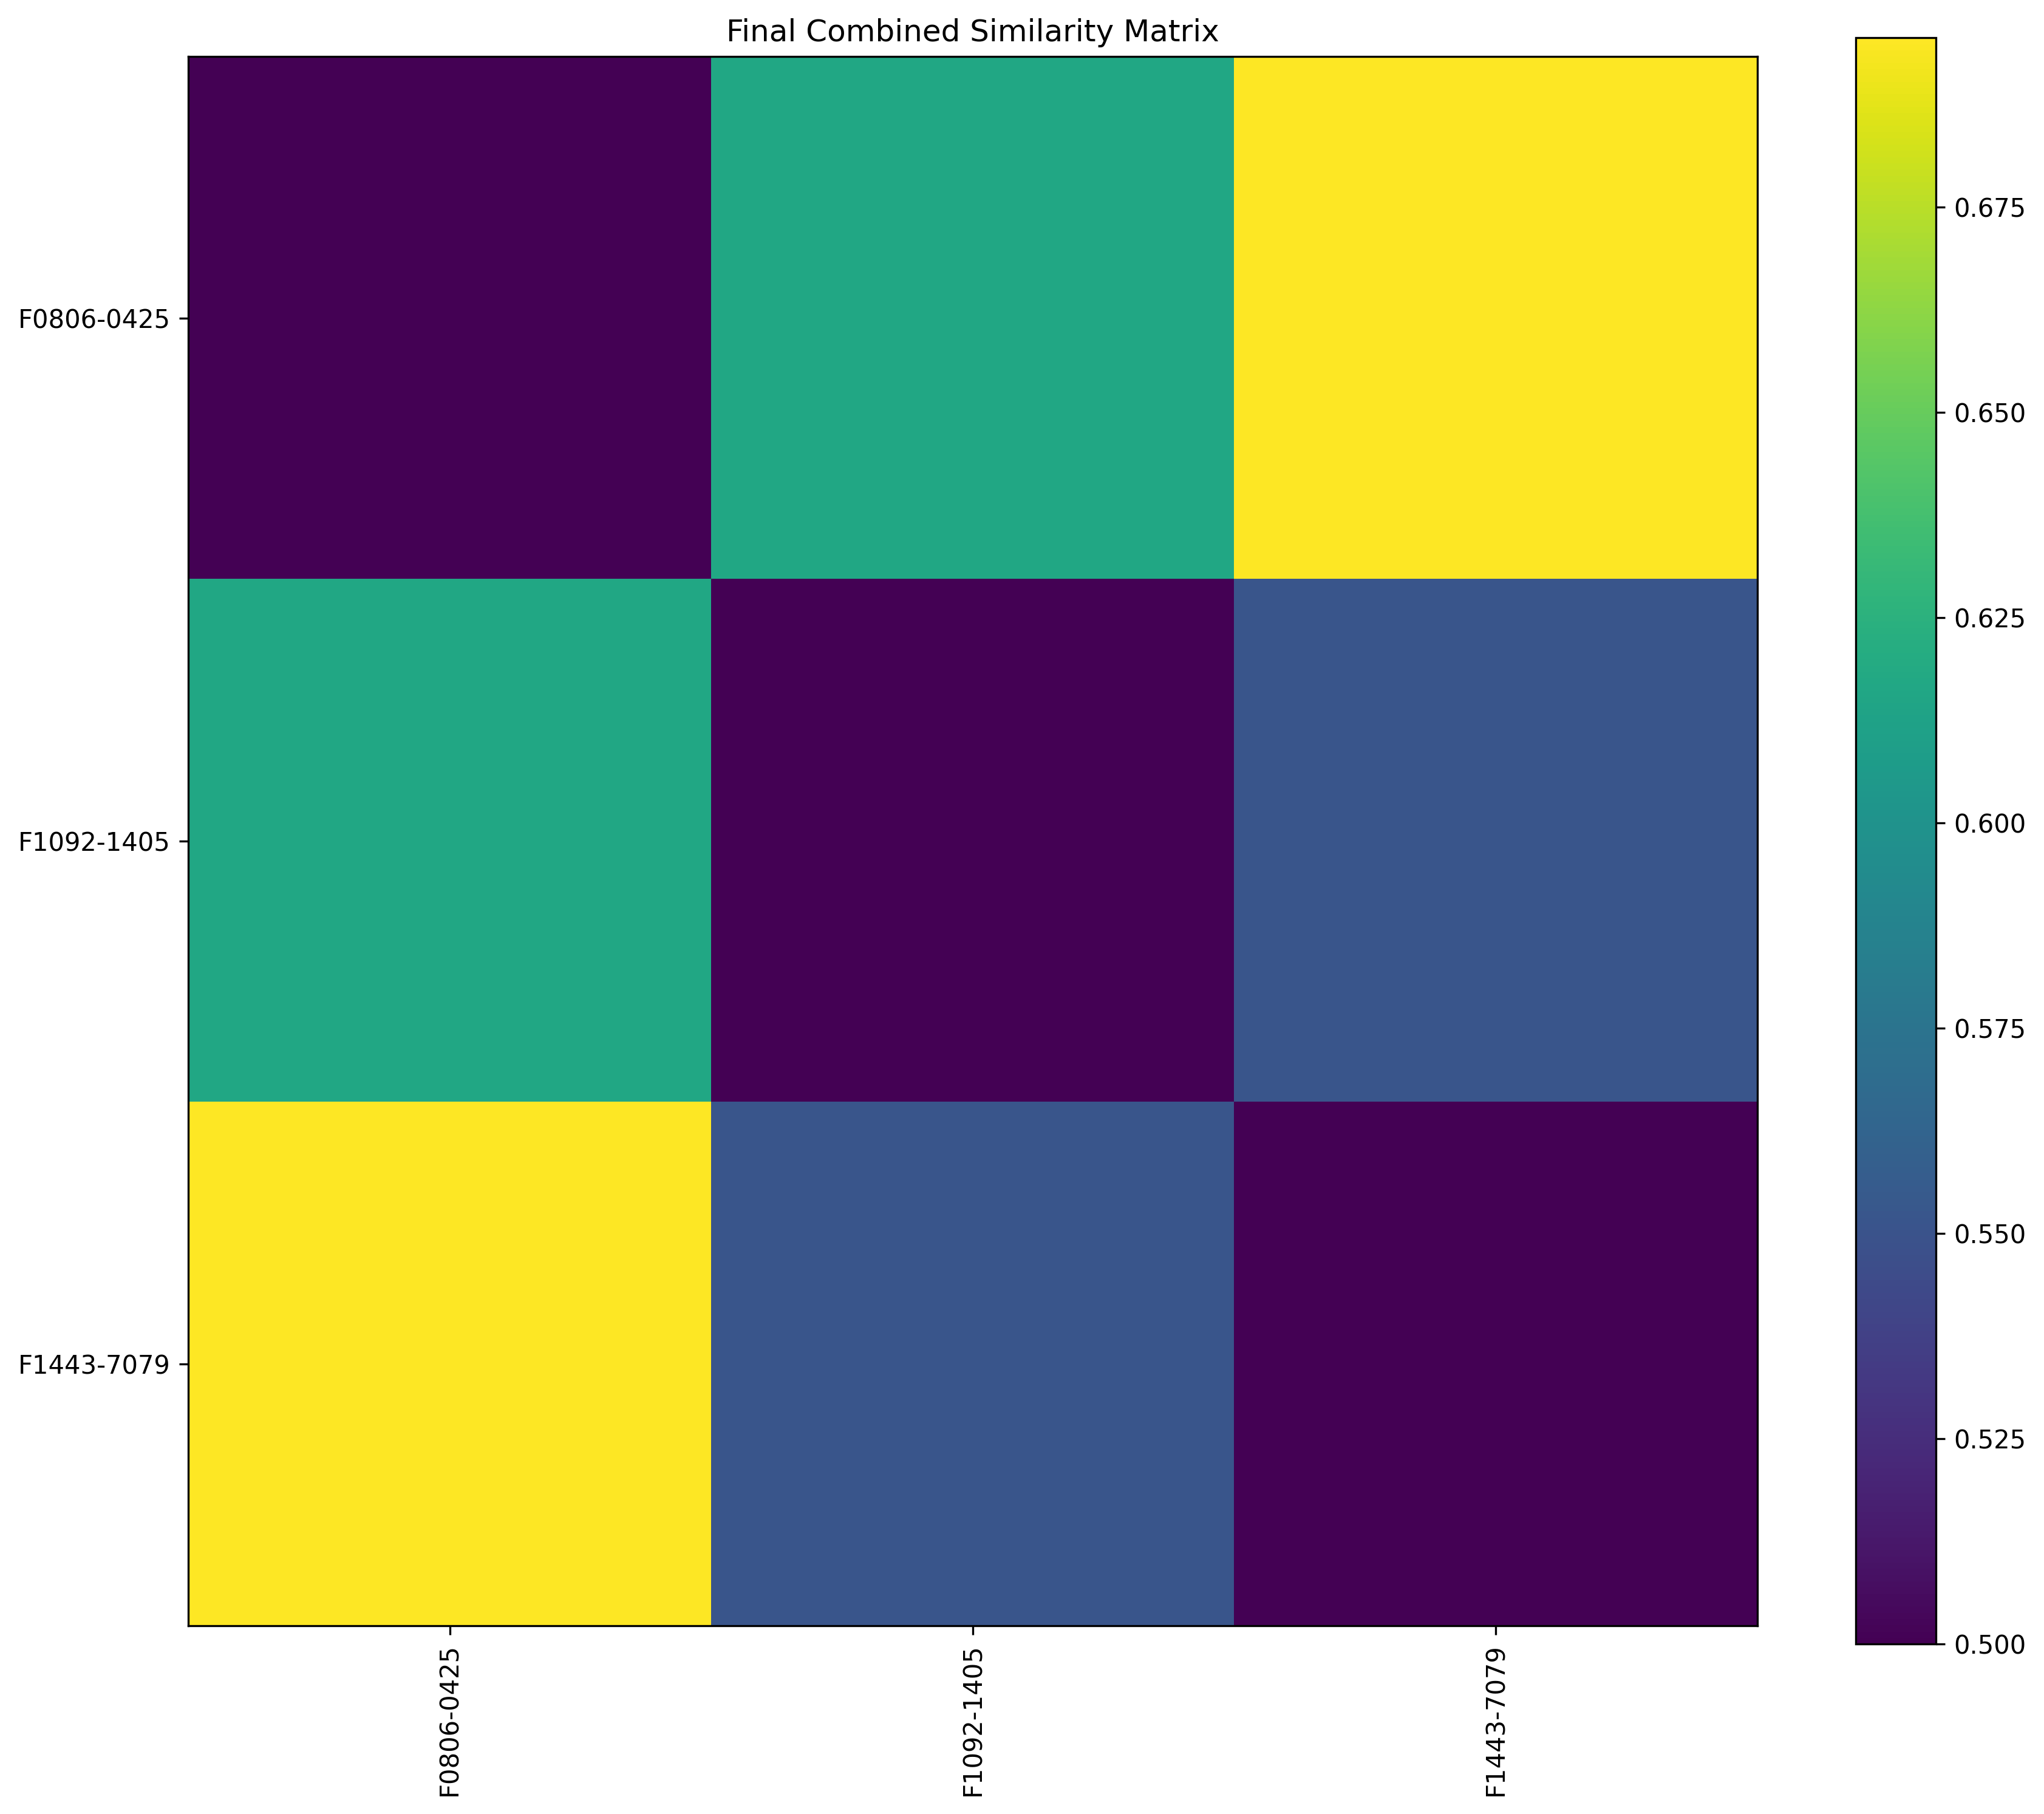

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Jaccard Index similarity matrix
jaccard_df = pd.read_csv('combined_jaccard_matrix.csv', index_col=0)

# Load the Pearson correlation similarity matrix
compound_correlation_matrix = pd.read_csv('compound_similarity_matrix.csv', index_col=0)

# Ensure both matrices have the same order of compounds
compounds = sorted(set(jaccard_df.index) & set(compound_correlation_matrix.index))
jaccard_df = jaccard_df.reindex(index=compounds, columns=compounds).fillna(0)
compound_correlation_matrix = compound_correlation_matrix.reindex(index=compounds, columns=compounds).fillna(0)

# Combine the matrices by averaging
combined_matrix = (jaccard_df.values + compound_correlation_matrix.values) / 2

# Create a DataFrame for the combined matrix
combined_df = pd.DataFrame(combined_matrix, index=compounds, columns=compounds)

# Save the combined matrix to a new CSV file
combined_df.to_csv('final_combined_similarity_matrix.csv')

# Plot the combined matrix
plt.figure(figsize=(12, 10), dpi=300)
plt.imshow(combined_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(compounds)), labels=compounds, rotation=90)
plt.yticks(ticks=np.arange(len(compounds)), labels=compounds)
plt.title('Final Combined Similarity Matrix')
plt.tight_layout()
plt.savefig('final_combined_similarity_matrix.png', dpi=300)
plt.show()

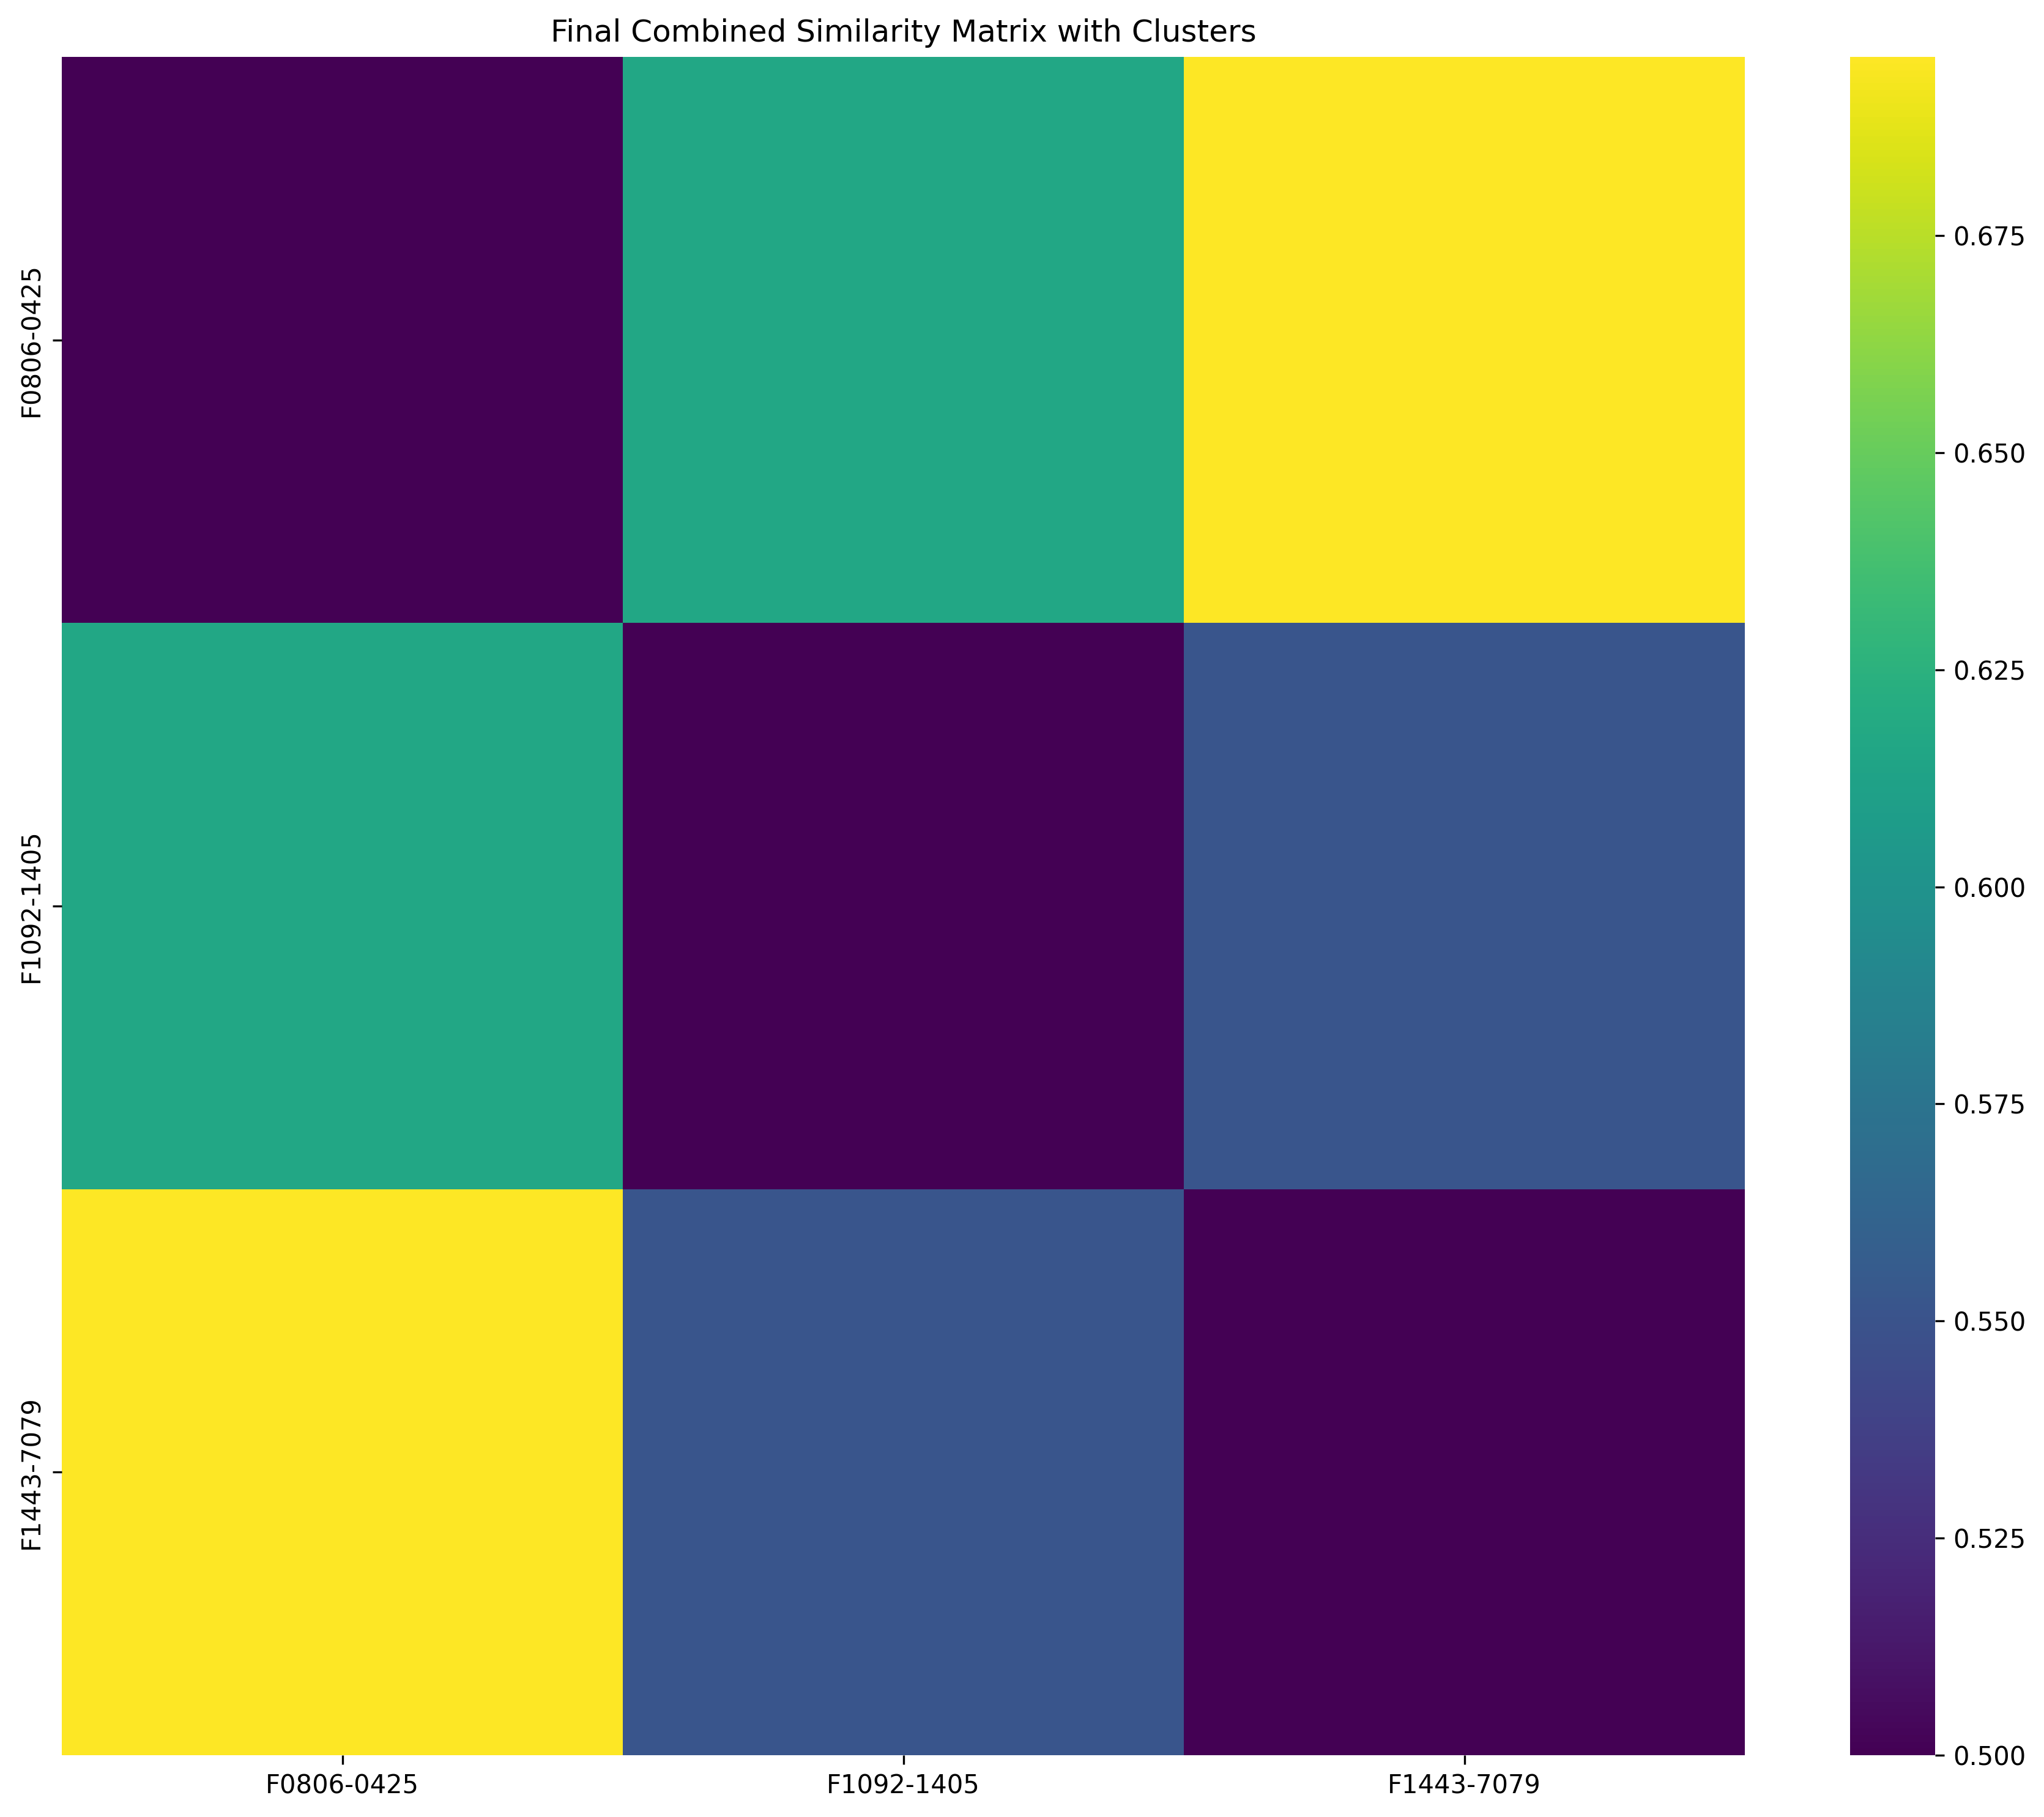

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

# Load the Jaccard Index similarity matrix
jaccard_df = pd.read_csv('combined_jaccard_matrix.csv', index_col=0)

# Load the Pearson correlation similarity matrix
compound_correlation_matrix = pd.read_csv('compound_similarity_matrix.csv', index_col=0)

# Ensure both matrices have the same order of compounds
compounds = sorted(set(jaccard_df.index) & set(compound_correlation_matrix.index))
jaccard_df = jaccard_df.reindex(index=compounds, columns=compounds).fillna(0)
compound_correlation_matrix = compound_correlation_matrix.reindex(index=compounds, columns=compounds).fillna(0)

# Combine the matrices by averaging
combined_matrix = (jaccard_df.values + compound_correlation_matrix.values) / 2

# Create a DataFrame for the combined matrix
combined_df = pd.DataFrame(combined_matrix, index=compounds, columns=compounds)

# Perform hierarchical clustering
linkage_matrix = linkage(combined_matrix, method='ward')
dendro = dendrogram(linkage_matrix, labels=compounds, no_plot=True)
ordered_compounds = leaves_list(linkage_matrix)

# Reorder the combined matrix according to the clustering
ordered_combined_df = combined_df.iloc[ordered_compounds, ordered_compounds]

# Save the reordered combined matrix to a new CSV file
ordered_combined_df.to_csv('final_combined_similarity_matrix_with_clusters.csv')

# Plot the clustered combined matrix
plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(ordered_combined_df, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title('Final Combined Similarity Matrix with Clusters')
plt.tight_layout()
plt.savefig('final_combined_similarity_matrix_with_clusters.png', dpi=300)
plt.show()